In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

import bertopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util
from IPython.display import clear_output

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

from sklearn.metrics import mean_squared_error, make_scorer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from nltk.tokenize import word_tokenize

import transformers
from transformers import pipeline

from pprint import pprint

In [8]:
data = pd.read_csv("cleaned_reviews.csv")

In [9]:
data.head()

,Unnamed: 0,restaurant_name,cleaned,word_count,review_rating,restaurant_label
0,0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0
1,1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0
2,2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0
3,3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0
4,4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0


In [10]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40947 entries, 0 to 40946
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   restaurant_name   40947 non-null  object 
 1   cleaned           40946 non-null  object 
 2   word_count        40947 non-null  int64  
 3   review_rating     40947 non-null  float64
 4   restaurant_label  40947 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ MB


In [12]:
data[data['cleaned'].isnull()]

,restaurant_name,cleaned,word_count,review_rating,restaurant_label
28025,pasta_brava_italian_restaurant,NaN,1,5.0,87


In [13]:
data = data[~data['cleaned'].isnull()]

In [14]:
data.rename(columns={'cleaned':'review_text'}, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40946 entries, 0 to 40946
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   restaurant_name   40946 non-null  object 
 1   review_text       40946 non-null  object 
 2   word_count        40946 non-null  int64  
 3   review_rating     40946 non-null  float64
 4   restaurant_label  40946 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
# Unsupervised

In [17]:
reviews = data[['review_text','restaurant_label']]

In [18]:
reviews.head()

,review_text,restaurant_label
0,come entre nous periodically past year seem se...,0
1,absolutely delicious menu lovely offer excepti...,0
2,thank much choose entre nous creperie recently...,0
3,lovely little french restaurant really authent...,0
4,dear rebecca thank much dining entre nous crep...,0


In [20]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [28]:
# # Load the SentenceTransformer model
# model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

# # Create a BERTopic model
# topic_model = BERTopic()

# # Assuming your DataFrame is named 'reviews'
# unique_restaurants = reviews['restaurant_label'].unique()

# for label in unique_restaurants:
#     # Filter reviews for the current restaurant
#     restaurant_reviews = reviews.loc[reviews['restaurant_label'] == label, 'review_text'].tolist()

#     # Check if there are reviews for the current restaurant
#     if restaurant_reviews:
#         # Transform reviews into embeddings using the SentenceTransformer model
#         embeddings = np.array(model.encode(restaurant_reviews))

#         # Fit and transform the reviews for the current restaurant
#         topics, _ = topic_model.fit_transform(restaurant_reviews, embeddings=embeddings)

#         # Print or store the topics for the current restaurant
#         print(f"Topics for Restaurant {label}:", topics)
#     else:
#         print(f"No reviews found for Restaurant {label}")

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

2023-11-25 15:27:33,588 - BERTopic - Reduced dimensionality
2023-11-25 15:27:33,614 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 0: [-1, 0, 8, 3, 8, 0, 2, 0, 1, 0, 1, 0, 1, -1, 2, 0, -1, 0, 5, 0, 1, -1, 2, 0, 0, 0, 1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 13, 0, -1, 0, -1, 0, -1, 0, 1, 0, 5, 13, -1, 0, 13, 0, -1, 0, 2, 0, -1, -1, 1, 0, 0, 5, 0, 5, 0, 1, 0, 1, 0, -1, 0, 2, 0, 2, 0, 0, 1, 3, 1, 0, 6, 0, 8, 0, -1, 0, -1, 0, -1, 0, 0, 1, 0, 13, 0, 6, 0, 2, 0, 6, 0, 2, -1, -1, 0, 0, 1, 0, 10, 0, -1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, -1, 0, -1, 0, 8, 0, 0, 0, -1, 3, -1, 0, 5, 0, -1, 7, 0, 10, 0, 1, 0, 1, 3, 4, 0, 1, 0, 1, 0, 0, -1, -1, -1, 0, -1, 0, 1, 3, -1, 0, -1, 0, -1, 0, 0, -1, 0, 13, 0, -1, 0, 2, 0, 8, -1, -1, 0, 13, 0, -1, 1, 0, -1, 0, 7, 0, -1, 0, -1, 0, 2, 0, 6, 0, -1, 1, 0, 2, 0, 13, 0, 8, 0, 1, 0, -1, -1, -1, 0, 0, -1, 0, 1, 0, -1, 0, -1, 0, 7, 0, 8, 0, 12, 0, 0, 5, 0, 4, 0, 5, 0, 1, -1, -1, 0, -1, 0, 1, 0, 0, -1, 0, 2, 0, 6, 0, 2, 0, 8, -1, -1, 0, -1, 0, 0, 1, 0, 1, -1, -1, 0, 2, 0, 1, 0, -1, 0, 1, -1, 0, 1, 0, -1, 0, 2, -1, 2, 0, 5, 0, 12, 0, 1, 0, 0, 12, 0, 1, 0, 1, 0, 1, 0, 1, 0, -1, 0, 5, 0, 

2023-11-25 15:27:35,345 - BERTopic - Reduced dimensionality
2023-11-25 15:27:35,351 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 1: [5, 2, -1, 5, -1, 1, 5, 1, 5, -1, 5, -1, 3, 5, 0, -1, 3, -1, 3, 1, 1, 2, -1, 0, 1, 1, 1, -1, 1, 3, -1, 5, 0, 2, 5, 2, 1, 4, -1, -1, 5, 0, 3, 2, 2, -1, 2, 1, -1, 1, 0, 2, 2, 4, 0, 0, -1, 0, 4, 1, 0, 0, -1, 0, 5, -1, -1, 0, 4, 0, 1, 1, -1, 4, 5, -1, -1, 0, 0, 2, -1, 1, 1, 3, 2, 3, -1, -1, -1, -1, 3, 2, 1, -1, 1, 2, 0, 1, 0, 0, 0, 0, -1, 5, 1, -1, -1, 0, 3, -1, 3, 2, 1, -1, 0, 3, -1, 1, 5, -1, 1, 0, 0, -1, -1, 2, -1, 1, -1, 0, -1, 0, 0, -1, 3, 0, 0, -1, 0, 0, 1, 0, 3, 4, -1, 3, 1, -1, -1, -1, -1, -1, -1, 0, 1, -1, -1, -1, -1, -1, 0, 1, 1, -1, 2, -1, -1, 0, 3, 2, 0, -1, 2, 1, 4, 0, -1, 1, -1, 0, 2, 0, 1, -1, -1, 3, 0, 2, 0, -1, 0, -1, 3, 4, -1, 0, 0, 0, 3, 3, -1, 1, -1, 2, 2, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 4, 1, 1, 3, -1, 2, 1, 2, 0, -1, 0, -1, -1, 1, 2, 3, 1, 3, 1, 0, 0, 1, -1, 0, 0, -1, 0, 3, 1, -1, 0, 3, -1, 1, 2, 2, -1, -1, 0, 3, -1, 0, -1, -1, 0, 2, -1, 1, 1, 0, 0, 0, 3, 3, -1, 2, 4, 4, 1, 0, 2, -1, 4, -1, 2, -1, 1, -1, -1, 0, 2, 2, 1, -1, 3, 1, -1, -1, 0, 

2023-11-25 15:27:36,504 - BERTopic - Reduced dimensionality
2023-11-25 15:27:36,508 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 2: [0, 0, 2, -1, 0, -1, -1, -1, -1, -1, -1, 0, 1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, 2, -1, 0, 0, -1, 0, 0, 1, 0, -1, 0, 2, 1, 2, 1, 2, -1, -1, 1, -1, -1, 2, 1, -1, 0, 0, 1, 1, 1, 1, -1, -1, 0, -1, 1, 2, -1, -1, -1, 2, -1, -1, -1, 0, -1, 0, -1, -1, -1, 1, 2, -1, 1, 2, 0, 1, 0, 1, 1, -1, 2, 2, 1, 0, 2, -1, -1, -1, 1, 0, -1, -1, -1, 1, 0, 0, 0, -1, -1, -1, 1, -1, -1, 0, 1, 0, 0, -1, -1, 0, -1, 2, 1, -1, -1, 1, -1, 0, 1, -1, 2, -1, 1, -1, -1, 1, -1, 2, -1, 0, -1]


2023-11-25 15:27:37,557 - BERTopic - Reduced dimensionality
2023-11-25 15:27:37,560 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 3: [-1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 0, 0, -1, -1, -1, 2, 1, 0, 1, -1, 0, -1, 2, -1, 0, 1, 0, 0, -1, -1, 2, -1, -1, 1, 2, 1, 1, 1, 2, -1, 0, -1, 2, 1, 2, -1, 1, 0, 1, 1, 0, 0, -1, 0, 1, 1, 0, 1, 2, 0, -1, -1, 0, -1, 1, -1, 1, 2, 0, 0, 0, -1, -1, -1, 2, -1, 2, 0, -1, -1, -1, 0, 0, 0, 2, -1, -1, 1, 0, -1, 0, 0, -1, -1, 1, 2, -1]


2023-11-25 15:27:39,640 - BERTopic - Reduced dimensionality
2023-11-25 15:27:39,647 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

2023-11-25 15:27:41,278 - BERTopic - Reduced dimensionality
2023-11-25 15:27:41,284 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 5: [0, 0, 1, 0, 1, 0, 0, 1, 1, -1, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 1, 2, 1, 1, 1, 0, 0, -1, -1, 2, -1, -1, 1, 2, 2, 0, -1, 0, 0, -1, -1, 0, 0, 0, 1, 0, -1, 2, 2, 2, -1, -1, 0, 1, 0, 0, 0, -1, 1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, -1, -1, -1, -1, 2, 0, 0, -1, 0, -1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, -1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, -1, 2, -1, 2, 0, 0, 2, 0, 0, 1, -1, 0, 0, 2, -1, 0, 1, 0, 2, 0, -1, 2, 0, 0, 0, 2, -1, -1, 0, 1, 1, -1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 2, 1, 0, -1, 1, -1, 1, 1, 1, 0, 0, -1, -1, 1, -1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, -1, -1, 0, 0, 1, 1, 1, 1, 1, 1, -1, 0, 0, 0, 0, -1, 0, 1, 1, 0, -1, 2, -1, 0, 1, 1, 0, -1, 1, 1, 1, 1, 0, 0, -1, 0, 0, 0, 0, 1, -1, 1, 0, -1, 1, 0, 1, 0, -1, 0, -1, 1, 1, 1, -1, 2, 2, 1, -1, 2, -1, -1, 1, -1, 0, 2, -1, 1, 0, 1, 0, -1, 0, 1, 0, 0, 1, 1, -1, 1, 0, 2, 2, 0, 1, -1, -1, 0, 2, -1, 0, -1, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, -1, -1, 1, 2, -1, 0, 2, -1, 2, 0, 0, 1, 0, 0, 0, 0, -1, -1, 0, 1, 0, 0, 0, 0,

2023-11-25 15:27:46,791 - BERTopic - Reduced dimensionality
2023-11-25 15:27:46,818 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 6: [1, 1, 2, 1, 3, 1, 3, 6, 6, -1, 1, 1, 0, 3, 1, -1, 0, 0, 0, 3, 1, 3, 0, 1, 1, -1, 0, -1, 1, 11, 1, -1, 3, 11, 1, 7, 1, 11, -1, 7, -1, -1, 3, -1, 6, 0, 14, 3, 7, 3, 11, 0, 14, 3, 13, 3, 7, -1, 7, 0, 0, 7, 0, 14, 0, 13, 0, 7, 0, 13, -1, 7, 3, 13, -1, 1, 7, 0, 7, 0, 14, 1, 13, -1, 11, 1, 14, 1, 7, 0, 5, 13, -1, 7, -1, 14, 0, 7, 0, 14, -1, -1, 1, 13, 1, 0, 14, 3, 13, 1, 7, 1, 7, 1, 7, 0, 7, 0, 13, 1, 2, 7, 2, 7, 0, 14, 0, 11, -1, 14, -1, 7, 1, -1, 1, 0, 14, 1, 13, 3, 7, 1, 14, 1, -1, 2, 13, 1, 11, 6, 0, -1, -1, 3, 1, -1, 0, 0, 1, 2, 1, -1, 3, 1, 0, 6, 1, 1, 0, 1, 0, 0, 8, 0, -1, 2, 0, -1, 0, 1, 3, 7, -1, 3, 0, 1, 0, 2, 0, 0, -1, 0, 3, 6, 0, 1, 1, 1, 3, 1, 0, 1, 3, 0, -1, 1, 1, 9, 0, 1, 1, -1, -1, 0, 3, 1, 5, 3, 0, -1, -1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, -1, 3, -1, -1, 3, 0, -1, 1, 1, 1, 0, 3, 2, -1, -1, -1, 2, 1, 1, 3, 8, 2, 2, 0, 0, 1, 0, -1, 0, 0, 0, 6, 2, 1, -1, -1, 0, 0, 1, -1, 0, -1, -1, -1, 3, -1, 2, 7, 0, 7, 0, 11, 0, 8, 9, -1, 0, 1, 1, -1, -1, 1, 6, 0, -1,

2023-11-25 15:27:48,140 - BERTopic - Reduced dimensionality
2023-11-25 15:27:48,143 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 7: [1, 0, -1, 1, -1, 0, -1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, -1, 2, 1, 2, 2, 1, -1, 2, 0, -1, 1, -1, -1, 0, 2, 0, 2, 1, 0, 0, -1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, -1, 1, 0, 0, 0, 1, 0, 1, -1, -1, 1, 0, 0, 1, 2, -1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, -1, 1, 2, 2, 0, -1, 1, 1, -1, -1, 1, 0, -1, -1, 0, 0, -1, 1, 0, -1, -1, -1, 0, 2, 1, 0, -1, 0, 2, -1, 2, -1, 1, 0, 1, 0, 1, 0, 1, -1, 1, -1, 0, -1, 2, 1, 0, -1, 1, 2, 1, -1, 1, 2, 0, 0, -1, 2, 2, 0, -1, 0, 2, 1, 0, 2, 2, -1, 2, 0, -1, 1, -1, -1, -1, -1, 1, 2, 0, -1, 0, 1, -1, 1, 0, 2, -1, 2, 2, -1, 0, 0, 1, -1, 1, 1, 0]


2023-11-25 15:27:55,834 - BERTopic - Reduced dimensionality
2023-11-25 15:27:55,871 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 8: [0, 0, 0, 0, 5, 0, 6, 0, -1, 0, 6, 0, 10, 0, 6, 0, 6, 0, 6, 0, 5, 0, 14, 0, 5, 0, 15, 0, 6, 0, 0, 5, 0, -1, 0, 6, 0, 14, 0, 5, 0, 6, 0, 14, 0, 0, 5, 0, 6, 0, 6, 0, 15, 0, 14, 0, 14, 0, 6, 0, 0, 6, 0, 5, 0, 10, 0, 14, 0, 5, 0, -1, 0, 11, 0, 0, 14, 0, 11, 0, 11, 0, 14, 0, 6, 0, -1, 0, 14, 0, 6, 6, 0, 6, 0, 5, 0, 6, 0, 15, 0, 14, 0, 6, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 11, 0, 15, 0, 6, 0, 11, 0, 14, 0, 6, 0, 11, 0, 6, 0, 15, 0, 6, 0, 10, 0, 0, 14, 0, 11, 0, 15, 0, 11, 0, 14, 0, 14, 0, 11, 0, 0, 6, 0, 14, 0, 0, 11, 0, 0, 6, 0, 10, 0, 14, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 11, 0, 0, 5, 0, 11, 0, 11, 0, 0, 0, 14, 0, 6, 0, 0, 0, 11, 0, 0, 11, 0, 10, 0, -1, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 15, 0, 0, 0, 0, 11, 0, 15, 0, 11, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

2023-11-25 15:27:59,163 - BERTopic - Reduced dimensionality
2023-11-25 15:27:59,178 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 9: [4, 5, 7, 3, 10, 7, 0, 4, 1, -1, 6, 3, -1, -1, 11, -1, 9, 3, 11, -1, -1, 4, -1, 0, 10, -1, 1, 5, -1, -1, 3, 0, -1, 1, 4, 11, 2, 1, 7, -1, -1, 0, -1, 10, 5, 4, 10, -1, -1, -1, 0, -1, -1, -1, 12, 5, 10, 3, -1, 2, 8, 11, -1, -1, 2, 6, 5, 10, -1, 1, -1, -1, -1, 0, -1, -1, 0, -1, 0, 2, 1, -1, 6, 13, 0, 7, 0, 2, 0, -1, 13, -1, 8, -1, 2, -1, -1, 9, -1, -1, -1, 12, 4, 6, 7, 2, 8, 0, 3, 12, 2, 12, 3, 6, -1, 0, 2, 10, 8, 0, -1, 10, -1, 0, 2, -1, 13, 0, -1, 1, 2, 0, 5, -1, 2, -1, 10, 2, 6, -1, 1, -1, 1, -1, 9, 2, 12, -1, -1, 7, 7, 11, 5, -1, 2, 10, 3, 0, -1, 0, -1, 1, 7, 0, 7, 8, 2, -1, 8, -1, 6, 8, 5, 10, -1, 1, 13, 6, 2, 1, -1, 0, 3, -1, 4, 10, -1, -1, 4, -1, 8, 9, -1, 6, 3, 3, -1, 8, 0, 7, -1, 4, 1, 11, -1, 4, 0, -1, -1, 5, -1, 0, 5, 9, 5, -1, 13, -1, 3, 1, 2, 0, -1, -1, -1, -1, 0, -1, 1, -1, 12, -1, 6, 2, -1, 3, 0, -1, 0, 3, 3, 6, -1, 6, 3, 9, 13, 1, -1, -1, 1, -1, 1, -1, 1, -1, 8, -1, 0, -1, 0, -1, 11, 2, 2, -1, 7, 9, -1, 0, 8, -1, -1, -1, 0, 3, 10, 3, 0, -1, -1, 8, 

2023-11-25 15:28:00,298 - BERTopic - Reduced dimensionality
2023-11-25 15:28:00,302 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 10: [-1, 1, 1, 1, -1, -1, -1, 1, 1, 0, -1, 2, 1, -1, -1, -1, 2, 2, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 2, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 2, -1, 0, -1, -1, 0, -1, 2, 1, -1, -1, 2, -1, -1, 0, -1, -1, 0, -1, -1, 1, 0, 0, 2, -1, 0, 2, -1, -1, 0, 0, 0, -1, 2, -1, 0, 0, 0, -1, 0, -1, 0, 0, 2, -1, -1, -1, -1, -1, 2, 1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 2, -1, 0, 2, 0, 0, 0, -1, -1, 2, -1, 0, 0, -1, 0, 0, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 2, -1, 0, 0, 1, -1, 0, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1]


2023-11-25 15:28:01,522 - BERTopic - Reduced dimensionality
2023-11-25 15:28:01,524 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 11: [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 0, -1, 0, 1, 1, -1, 0, 1, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


2023-11-25 15:28:02,863 - BERTopic - Reduced dimensionality
2023-11-25 15:28:02,868 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 12: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]


2023-11-25 15:28:03,924 - BERTopic - Reduced dimensionality
2023-11-25 15:28:03,927 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 13: [-1, 1, -1, 2, 2, 0, 2, 2, 0, -1, -1, -1, -1, -1, -1, 2, 1, 2, 0, 2, 2, 2, -1, 0, -1, -1, -1, 0, 1, -1, 0, -1, 1, 0, -1, -1, -1, 0, -1, 2, 2, 0, -1, -1, -1, 1, -1, 1, -1, -1, -1, 2, 2, 1, -1, -1, -1, 1, 1, -1, 2, -1, -1, 0, 1, 1, 0, 0, 2, -1, -1, 2, 2, -1, 0, -1, 1, 0, -1, 2, 2, 2, -1, -1, 1, -1, 2, 1, -1, 0, 0, -1, 1, 0, 1, -1, 0, -1, 2, -1, -1, -1, 1, 2, 1, 0, -1, 0, -1, 1, 0, -1, 0, 1, -1, 0, -1, 1, -1, 0, 1, -1, 1, 0, -1, 0, -1, -1, -1, 1, -1, 1, 2, -1, 1, -1, 2, 2, -1, -1, -1, 0, 1, 0, -1]


2023-11-25 15:28:05,866 - BERTopic - Reduced dimensionality
2023-11-25 15:28:05,874 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 14: [-1, 1, 2, -1, -1, -1, 0, -1, 0, 0, -1, 1, -1, -1, -1, 0, 4, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 1, -1, 2, 2, 0, -1, -1, 3, 0, 3, 0, 4, 0, 1, -1, -1, 3, 1, -1, 1, -1, 0, -1, 0, -1, 0, 3, -1, 0, 2, 0, 4, 2, -1, 4, 0, 1, -1, -1, 4, 0, -1, 1, -1, 0, 2, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 0, 4, 0, -1, -1, 1, -1, -1, 4, -1, 2, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, 1, 4, -1, 2, -1, 1, -1, 1, 1, 0, 0, -1, -1, 0, -1, 1, 0, 1, -1, 0, 1, -1, -1, -1, 0, 0, -1, 1, 0, -1, -1, -1, 1, -1, 0, 4, 1, 0, 1, -1, -1, -1, 1, -1, 2, -1, -1, -1, 2, 2, 0, 0, 2, 0, -1, 2, -1, 2, 1, 0, -1, 0, 2, -1, 2, -1, 0, -1, -1, -1, 1, 2, 1, -1, 2, 0, 2, -1, -1, 0, 1, -1, 4, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 2, 1, 2, 0, 0, 0, -1, 1, 0, -1, -1, 0, -1, 1, 4, -1, -1, 1, 0, -1, -1, -1, 0, 4, 0, 1, -1, -1, 2, 1, 4, 1, -1, -1, 0, -1, 1, -1, 0, 1, 0, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, -1, 4, 2, -1, -1, -1, -1, 0, -1, 2, -1, 2, 0, -1, -1, -

2023-11-25 15:28:08,076 - BERTopic - Reduced dimensionality
2023-11-25 15:28:08,086 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 15: [0, -1, 2, -1, 0, 1, 1, 5, 2, 0, -1, 0, 1, 1, 3, 5, -1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, -1, 2, 2, 1, 2, 5, -1, 0, 2, 3, 2, 1, 3, 3, -1, 2, 0, -1, 3, 2, 5, -1, 3, 2, 1, -1, 0, -1, 0, 0, 1, 5, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 3, 0, 5, 3, 2, -1, -1, -1, 2, -1, 5, 0, 2, 3, 5, -1, -1, 2, 1, 0, -1, 3, 5, 2, 2, 1, 0, -1, 3, 0, 2, 0, 3, 3, 2, -1, 2, 0, -1, -1, -1, -1, -1, 5, 2, 0, 4, 1, -1, 0, 0, 1, 0, 0, -1, 0, -1, 2, -1, -1, 5, 1, 2, 0, 2, 2, 0, -1, 3, 1, 0, 1, -1, 1, 1, 0, 2, 3, 3, 1, 1, 1, 3, -1, 0, -1, 1, 0, 1, 2, 2, 3, -1, 0, -1, 0, 2, -1, -1, 1, 1, 3, 1, 4, -1, 0, 4, 0, -1, 3, -1, -1, 4, 0, 0, 2, 2, 1, -1, 2, 0, 2, 0, -1, 2, 1, 3, 2, 1, 1, 0, -1, 0, 2, 1, 0, 0, 0, 5, 2, 0, 0, -1, 4, 4, -1, 0, -1, 1, 1, 4, -1, -1, 1, -1, 0, 0, -1, 1, 0, 0, -1, 1, -1, 3, 1, -1, 2, 2, 2, -1, -1, 3, 1, 0, 1, 2, 0, -1, 1, 2, 1, 3, -1, 0, 1, -1, -1, -1, 1, 2, 2, 0, 1, 0, 1, 0, 3, 5, 4, 0, -1, 1, 0, 2, 2, 1, -1, 1, 0, -1, 1, 0, 0, -1, 5, -1, 3, 1, -1, -1, 1, 1, 1, -1, 0, 2, -1, 2, 0, 2, 

2023-11-25 15:28:09,187 - BERTopic - Reduced dimensionality
2023-11-25 15:28:09,190 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 16: [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 0, -1, 0, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, -1, -1, 1, 0, 0, -1, -1, -1, -1, 1, 0, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 1, -1, -1, -1, 0, 0, 0, -1, 0, -1, -1, 0, -1, -1, -1, -1, 1, 0, -1, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, 1, 0, 0, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1]


2023-11-25 15:28:10,292 - BERTopic - Reduced dimensionality
2023-11-25 15:28:10,296 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 17: [1, -1, 0, 1, 0, -1, 1, 0, -1, 0, -1, 1, 0, -1, 0, 0, -1, 0, 1, -1, 0, -1, 0, 1, 0, 1, -1, 1, -1, 0, -1, 0, 0, 1, 0, 1, 0, -1, 1, 1, 1, 1, 0, 0, 0, 1, 0, -1, 1, 1, 1, 0, 1, -1, -1, 1, 1, 1, 1, 1, 0, 0, 0, -1, 0, 1, -1, -1, 0, 0, 0, 1, -1, 0, 1, 0, 0, 0, 1, -1, 0, 1, 0, -1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, -1, 1, -1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, -1, 1, 0, -1, -1, 0, 0, 0, 0, -1, 1, -1, 0, -1, 0, 0, 1, 1, -1, 0, 0, 1, 0, 1, -1, 0, 1, 0, 1, 1, -1, -1, 0]


2023-11-25 15:28:11,424 - BERTopic - Reduced dimensionality
2023-11-25 15:28:11,426 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 18: [-1, 1, 1, 1, 0, -1, -1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 0, -1, 0, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, 0, 0]


2023-11-25 15:28:14,744 - BERTopic - Reduced dimensionality
2023-11-25 15:28:14,761 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 19: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0

2023-11-25 15:28:15,732 - BERTopic - Reduced dimensionality
2023-11-25 15:28:15,734 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 20: [0, 1, 1, 0, 1, -1, 1, 0, -1, 0, -1, -1, -1, -1, 0, 0, 0, -1, 0, -1, 1, -1, -1, -1, 1, -1, -1, 0, -1, -1, 1, 0, -1, -1, 0, -1, -1, 1, -1, 0, 1, -1, 0, -1, 1, 1, -1, 0, 0, -1, 1, 0, 1, -1, -1, 0, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0]


2023-11-25 15:28:16,697 - BERTopic - Reduced dimensionality
2023-11-25 15:28:16,699 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 21: [-1, -1, 0, -1, 1, 0, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 0, 0, 0, 1, 0, 1, -1, 1, -1, -1, 1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 0, 0, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1, 0, -1, -1, 1, -1]


2023-11-25 15:28:19,040 - BERTopic - Reduced dimensionality
2023-11-25 15:28:19,052 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 22: [-1, 0, 0, 3, 1, 5, 2, 0, -1, 2, 3, 0, 2, 5, 3, -1, -1, 3, 3, -1, 1, 1, 0, -1, -1, -1, 7, -1, -1, 4, -1, -1, -1, -1, -1, 2, 4, 1, 1, 4, 3, 3, 0, 0, 5, -1, 0, 0, 3, -1, 2, -1, 3, 6, 0, -1, -1, 8, -1, 3, -1, 2, -1, 0, 2, -1, 2, -1, 0, 0, -1, 0, -1, 3, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, 0, 3, 2, 0, -1, -1, -1, 3, 7, 0, 0, -1, 5, 1, 0, -1, 2, 4, -1, -1, 3, 8, -1, 2, 4, 3, 3, 2, 1, 3, 0, -1, 0, -1, -1, 0, 0, -1, -1, 1, -1, 6, 2, 2, -1, -1, -1, -1, 0, -1, -1, -1, 0, 7, -1, 0, 0, -1, 0, 7, -1, 1, 3, -1, -1, -1, -1, 3, -1, -1, 0, -1, 0, -1, 0, -1, 3, 0, 0, -1, -1, 0, -1, -1, -1, 0, -1, -1, 2, 0, 0, 2, -1, 8, 5, 3, -1, -1, -1, 4, 1, -1, -1, 0, -1, -1, 1, 6, -1, -1, -1, 3, -1, 7, 2, 0, -1, 2, 3, -1, -1, -1, 1, 3, 0, 2, 0, -1, -1, 6, -1, 0, 1, 1, -1, -1, -1, -1, -1, 3, 1, 1, 3, -1, -1, -1, -1, 1, 1, -1, 3, -1, 2, 4, -1, 6, -1, -1, 2, -1, -1, 2, 2, 3, 4, -1, 0, 0, 0, 2, 1, 2, -1, 2, 0, 0, 3, 1, 2, 1, 6, -1, 4, 2, -1, -1, 1, 2, 5, 1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, 

2023-11-25 15:28:19,967 - BERTopic - Reduced dimensionality
2023-11-25 15:28:19,969 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 23: [-1, 0, -1, 1, -1, -1, -1, 1, 1, -1, -1, 0, -1, 0, -1, 1, 1, 1, -1, -1, -1, -1, 0, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, 0, -1, 0, 1, 0, -1, 1, 0, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 0, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1]


2023-11-25 15:28:21,466 - BERTopic - Reduced dimensionality
2023-11-25 15:28:21,471 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 24: [-1, -1, -1, 0, -1, -1, 0, 5, 2, 0, -1, 0, 2, -1, 3, 2, 1, 1, 2, 2, -1, 4, 5, 4, 5, -1, -1, 1, -1, -1, -1, 5, 1, 2, 4, -1, 1, -1, 0, 0, 2, -1, -1, 4, -1, 5, 0, -1, -1, -1, 2, 0, 4, 0, 0, 2, -1, 2, -1, -1, 0, 5, -1, 1, -1, 1, -1, 4, 5, -1, 0, -1, 0, 3, -1, -1, 3, -1, -1, 1, 0, -1, 1, 0, -1, -1, 3, 4, -1, -1, -1, 0, 0, 0, -1, -1, 3, 1, 4, 0, 0, -1, 0, -1, 3, 1, -1, -1, 4, 0, 1, 0, 0, 2, -1, 0, -1, -1, -1, 0, -1, -1, 1, -1, -1, 0, -1, 4, -1, 3, -1, 0, 3, -1, -1, 1, -1, 1, -1, -1, 2, 2, 1, -1, -1, -1, 1, 0, -1, 0, -1, 1, -1, -1, 5, 3, 0, -1, 1, -1, 0, 5, 0, -1, -1, -1, 0, 1, 1, -1, -1, -1, -1, 4, 1, -1, 0, 0, 1, -1, 2, 5, 0, 1, 3, -1, 1, -1, -1, 0, 0, -1, -1, -1, -1, 1, -1, 2, -1, -1, 0, 3, -1, -1, -1, 2, -1, -1, 3, 3, 0, 0, 0, -1, -1, 0, 1, -1, -1, 1, -1, 4, 2, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, 1, 3, -1, 1, -1, 1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, 2, -1, -1, -1, 0, 2, 1, 0, 0, 0, 3, -1, -1, 0, 5, 0, -1, 0, 0, 1, 0, -1, -1, 4, 1, -1, -1, -1, -1, 1, 3, 0, 0, 0, 

2023-11-25 15:28:23,454 - BERTopic - Reduced dimensionality
2023-11-25 15:28:23,460 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 25: [1, -1, -1, -1, 4, 2, -1, 2, 2, 4, 3, -1, 1, -1, 0, -1, 1, -1, 1, 0, -1, 0, -1, -1, 0, 1, 2, 0, 2, 4, 5, 1, -1, -1, -1, -1, -1, 5, -1, 0, 3, -1, 0, 0, -1, -1, 0, 0, -1, -1, 5, -1, 0, 1, 0, 5, 5, 4, -1, 4, 4, -1, 0, 0, 1, 0, 1, 4, 0, -1, 1, -1, 0, 1, -1, 0, -1, 0, 1, 0, 2, 0, -1, 0, 0, -1, 0, -1, 3, -1, 2, 1, 0, 3, 0, 2, 0, -1, 1, 0, -1, 4, 0, 0, 2, 5, 4, -1, 0, -1, 0, -1, -1, 3, -1, 3, -1, -1, -1, 0, 2, -1, -1, 4, 0, -1, 0, 0, 0, -1, 0, 2, -1, 1, 4, 1, 4, 1, 3, -1, 0, 1, 4, 0, 0, 0, 0, 3, -1, 3, -1, 1, -1, 1, -1, -1, 1, 1, -1, 3, -1, -1, 3, 0, -1, 0, 2, 0, 4, 1, -1, 1, 0, 1, 0, 3, 1, -1, 0, -1, -1, 1, -1, 1, -1, 1, 0, 5, -1, -1, 3, -1, 0, 3, 1, 0, -1, -1, 2, 0, -1, -1, -1, 0, 1, -1, 1, 0, 1, 0, 1, 0, -1, -1, 1, 5, -1, -1, 5, 1, 0, 5, 1, 1, -1, 1, 2, 1, 2, 0, -1, 1, 2, -1, 1, -1, 1, 1, -1, 2, 1, 1, 0, -1, 1, 1, 2, -1, -1, 1, -1, -1, -1, 1, -1, 1, 0, -1, 0, -1, 1, -1, 1, -1, 3, 2, 2, 2, 2, 2, 0, -1, 3, -1, 5, 4, -1, -1, 1, 3, 2, 4, 1, 2, 2, 0, 1, -1, 2, -1, 0, 0

2023-11-25 15:28:24,544 - BERTopic - Reduced dimensionality
2023-11-25 15:28:24,547 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 26: [-1, 1, 1, 1, -1, 0, -1, -1, -1, -1, 0, 1, -1, 0, -1, 0, -1, 1, 1, 0, -1, 0, -1, -1, 0, 0, -1, 1, 1, 0, -1, -1, 0, 0, -1, 1, -1, -1, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, 1, -1, -1, 0, -1, -1, 0, 1, 0, -1, 0, -1, 0, 0, -1, -1, -1, 1, 0, -1, 0, 1, 1, 1, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, 1, 0, 1, -1, -1, 1, -1, -1, 0, 0, 0, -1, 0, 0, 0, 1, -1, 0, 1, 0, 0, 1, 0, 1, 0, -1, -1, 0, 0, 0, 1, 0, 0, -1, -1, -1, 0, 0, -1, -1, 0, -1]


2023-11-25 15:28:25,355 - BERTopic - Reduced dimensionality
2023-11-25 15:28:25,357 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 27: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:28:26,251 - BERTopic - Reduced dimensionality
2023-11-25 15:28:26,253 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 28: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:28:28,129 - BERTopic - Reduced dimensionality
2023-11-25 15:28:28,138 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 29: [0, 0, 1, 0, -1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, -1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, -1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 1, 1, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, -1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 1, -1, 0, -1, 0, 0, 0, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 1, 0, -1, 0, 1, 0, 0, -1, 0, 1, 1, 1, -1, 0, -1, 1, -1, 0, 1, 0, 0, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0, 0, -1, 1, 1, 0, 0, -1, 1, -1, 0, 0, -1, 0, 0, -1, 0, -1, 1, 1, 1, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 1, 0, -1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 0, 0, 1, 1, -1, -1, 1, -1, 0, 0, -1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, -1, 

2023-11-25 15:28:30,200 - BERTopic - Reduced dimensionality
2023-11-25 15:28:30,209 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 30: [-1, 8, -1, -1, 5, 4, 10, 9, -1, 5, -1, 0, 3, 4, -1, -1, 4, 4, 6, 4, -1, 4, -1, -1, 5, 10, -1, 2, 5, -1, -1, -1, -1, -1, 6, -1, 4, 4, 10, -1, 3, 6, 8, 9, 2, 2, 8, 7, 6, 10, 4, -1, 4, 0, -1, 2, 4, 0, 2, 0, -1, -1, -1, 6, 4, 8, -1, 7, 3, 7, 8, -1, -1, 9, -1, -1, -1, 5, 5, -1, -1, 6, -1, 4, 9, 9, 3, -1, 5, 3, -1, -1, 4, -1, 4, 4, -1, 5, 0, 2, 7, 6, -1, -1, -1, 9, 2, -1, -1, 2, 2, 0, 8, 5, -1, 2, 6, -1, 8, -1, 2, -1, -1, 4, 8, 0, 0, -1, -1, 7, 2, 10, 3, 4, 3, 3, 1, -1, 1, 2, 1, 6, 1, -1, -1, 3, 1, 2, 0, 4, 4, -1, -1, -1, -1, 1, 10, 10, 11, 0, 4, 1, 5, 5, 5, 3, -1, 1, -1, 0, 2, 1, -1, 7, -1, 1, 10, 0, 9, 0, -1, 2, 3, 1, 7, 1, -1, 0, 7, 0, -1, -1, 4, 0, 9, -1, 1, 3, 1, 3, 5, 3, 5, 3, 3, 5, 1, 7, 0, -1, 3, 1, -1, 1, 8, 1, 9, 0, 6, 0, 9, 1, 7, 7, 11, 3, 1, 11, 1, -1, 0, 4, 0, 11, 1, 4, 0, 3, 1, 9, 2, 8, 0, 2, 8, 5, 0, 0, 4, 1, -1, 1, -1, 0, -1, -1, 0, 3, 0, 2, 1, -1, 0, 7, 1, 11, -1, 0, 0, -1, -1, 0, 3, 2, -1, 5, 2, 2, 5, 1, 2, 1, -1, 1, 2, 7, 1, 7, -1, -1, 8, 2, 0, -

2023-11-25 15:28:32,885 - BERTopic - Reduced dimensionality
2023-11-25 15:28:32,897 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 31: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 8, 0, 2, 0, 2, 0, 5, 3, 9, 0, 0, 2, 0, 4, 0, -1, 0, 9, 0, 0, 0, 5, 0, 2, 0, 0, 7, 0, 1, 0, 5, 0, 5, 0, 7, 0, 6, 0, 8, 0, 0, -1, 0, 0, 2, 0, 9, 3, -1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 4, 0, 9, 0, 0, 2, 0, 4, 0, 7, 0, 2, 0, 5, 0, 0, 0, 1, 0, 3, 0, 6, 0, 0, 0, 0, 6, 0, 2, 0, -1, 0, 4, 0, 5, 0, -1, 0, 9, 0, 0, -1, 0, 6, 0, 7, 0, 5, 0, 3, 0, 8, 0, 0, 0, 0, 6, 0, 8, 0, 9, 0, 7, 3, -1, 0, 4, 1, 1, 0, 0, 2, 0, 8, 0, 1, 0, 1, 0, 6, 0, 2, 0, 4, 0, 0, 0, 0, 8, 0, 0, 0, -1, 0, 1, 0, 2, 0, 9, 0, 0, 0, 0, 1, 0, 4, 0,

2023-11-25 15:28:34,854 - BERTopic - Reduced dimensionality
2023-11-25 15:28:34,860 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 32: [2, 0, 0, 0, 0, 2, 2, 2, 2, 1, -1, -1, -1, -1, 1, 2, 0, 0, 0, 0, -1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, -1, 1, 2, 1, -1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, -1, 2, 0, 1, 1, -1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, -1, -1, 2, 2, -1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, -1, 0, 1, 1, 2, 2, 0, 1, 1, -1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, -1, -1, 0, 1, -1, 2, 0, 0, 0, -1, 1, 0, 0, 0, 0, -1, 1, 1, 1, 2, 1, 1, 0, 0, 1, -1, 2, 1, 1, 1, -1, 1, 0, 1, 0, 1, 2, 0, 0, 2, -1, 0, -1, 2, -1, 0, -1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, -1, 2, 0, -1, 0, 0, 2, 0, 0, 0, -1, 0, 2, 1, 0, 0, -1, 1, 0, 1, 0, -1, -1, 2, 1, 2, 2, 0, 1, -1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, -1, 1, 0, 0, 1, -1, -1, 0, 0, 1, 1, 0, 0, -1, 1, 1, 2, -1, 1, 0, 1, 0,

2023-11-25 15:28:37,831 - BERTopic - Reduced dimensionality
2023-11-25 15:28:37,845 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 33: [3, -1, 3, -1, 0, -1, -1, -1, 4, 7, -1, 4, 8, 2, 3, 2, 0, -1, -1, 2, 7, 4, 5, 4, -1, -1, -1, 8, 6, -1, -1, 4, -1, 0, 0, 0, -1, 2, 0, -1, 4, 9, 4, -1, -1, 3, -1, 0, 0, -1, 3, 3, 5, -1, 1, 1, 3, 3, 0, 2, 0, 6, 0, 8, 3, 8, -1, 0, 7, -1, 1, -1, 0, -1, 0, 3, 4, 4, 2, 0, 0, 2, 0, 2, 0, -1, -1, 6, 3, 2, -1, 0, 4, -1, -1, 2, -1, -1, 6, 5, 8, -1, 3, -1, 3, -1, 6, -1, -1, 0, -1, -1, 8, -1, 0, 8, -1, 7, 8, 0, 1, -1, 0, 9, -1, -1, 0, 1, 7, -1, -1, -1, 0, 0, 9, -1, 10, 2, 0, -1, 4, 4, 4, -1, 4, 8, -1, 0, 0, -1, -1, 9, 0, -1, 0, 7, -1, 3, -1, -1, 0, 0, 0, 0, 0, 1, -1, 0, 1, 2, -1, -1, 6, 6, 0, -1, -1, 0, 0, 6, -1, 0, 3, 6, 0, 2, 1, 7, 6, 6, 0, 3, 1, -1, 0, 4, -1, 5, -1, 1, 0, 5, 1, -1, 0, -1, -1, 0, 9, 5, -1, -1, 3, 1, -1, -1, 7, -1, 0, -1, 8, 2, -1, -1, -1, 0, 7, 1, 0, 0, 0, 4, 10, 0, -1, 1, 9, -1, -1, -1, 0, -1, -1, 1, -1, 3, 2, 4, -1, -1, 0, -1, 6, -1, 7, 4, 8, 4, 5, 0, 5, -1, -1, -1, -1, 3, 0, 5, -1, 2, -1, 0, 4, 1, -1, 9, -1, 1, 0, -1, 8, 1, 6, 10, 3, -1, -1, 5, -1, -1

2023-11-25 15:28:39,043 - BERTopic - Reduced dimensionality
2023-11-25 15:28:39,046 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 34: [0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 1, -1, -1, -1, -1, 1, 1, 0, -1, 0, 1, -1, 0, 0, 1, 1, 0, 0, 0, -1, 1, 0, 0, 1, 0, 1, 1, -1, 0, 1, 0, -1, 0, -1, 0, 0, 1, -1, 1, 1, 1, -1, 0, 1, 1, 0, -1, -1, 0, 0, -1, 0, 1, -1, 0, 1, 0, 0, 0, -1, -1, 1, 1, -1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, -1, 0, 1, 1, 1, 1, -1, 0, 0, -1, -1, -1, 0, 0, 0, -1, 0, 0, 1, 0, -1, 0, -1, 0, 0, 1, 1, -1, -1, -1, 1, 0, 1, 0, -1, -1, 1, 0, -1, 1, -1, 1, 1, -1, 0]


2023-11-25 15:28:40,674 - BERTopic - Reduced dimensionality
2023-11-25 15:28:40,680 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 35: [-1, 1, -1, 0, 1, 0, 2, 1, -1, 0, -1, 2, 2, 2, 2, 0, 2, -1, 1, 1, 1, 2, -1, -1, 1, -1, -1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, -1, 0, 2, 2, 2, 2, 0, 2, -1, 0, 1, 1, 0, 2, -1, 0, 0, 1, 0, -1, -1, 1, 1, -1, 2, 0, 2, 2, -1, 2, 2, -1, 0, 0, 1, 1, 0, 2, -1, 1, 1, -1, 2, -1, 1, 2, -1, -1, 0, 1, 2, 0, 2, 2, 2, 0, -1, 2, 1, -1, 1, -1, 0, 0, 0, 0, 0, -1, 0, 2, -1, -1, 0, 1, -1, 2, -1, 2, 1, -1, 0, -1, 2, 2, 0, -1, 0, 2, 0, 1, 1, -1, 1, 0, 2, 1, -1, -1, 1, 0, -1, 1, 1, 0, -1, 0, 0, -1, -1, 0, 1, -1, -1, 1, 0, 0, -1, -1, 1, 0, 1, -1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, 0, 1, -1, 0, 2, 1, 0, 2, -1, 1, 1, -1, 0, 2, 2, 1, -1, 0, 0, -1, 1, 2, 2, -1, -1, 2, 0, 1, 2, -1, 1, 0, -1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, -1, 1, 1, 1, -1, -1, 0, -1, 0, -1, -1, 1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, 0, 1, 2, 1, -1, -1, 2, 1, -1, -1, 2, -1, -1, 0, -1, 0, 2, 0, -

2023-11-25 15:28:43,371 - BERTopic - Reduced dimensionality
2023-11-25 15:28:43,382 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 36: [-1, 1, 1, 1, 1, -1, 0, 4, -1, 1, -1, -1, 1, 2, 0, -1, -1, 4, 1, 1, -1, 0, 1, 5, 3, -1, -1, 0, 0, -1, 1, 3, -1, 0, -1, -1, -1, -1, 0, 1, 0, -1, 0, -1, 3, 1, 3, 2, 0, -1, -1, 2, 1, 5, -1, 0, -1, 1, 1, 1, 0, 4, 2, -1, 1, -1, 0, 1, 1, 1, -1, 2, -1, -1, 2, 0, 0, -1, 3, 0, -1, -1, 3, -1, 4, 0, 1, 0, 0, 5, 2, 1, -1, -1, 1, 1, -1, 0, 2, -1, 6, 6, -1, 0, -1, 1, 0, -1, -1, -1, -1, -1, 0, -1, 3, 1, -1, -1, 0, 3, 4, 3, -1, 4, 2, 3, 3, 0, 1, 1, 2, 0, 1, -1, 0, 0, 3, -1, 1, 0, 3, 3, -1, 1, 1, 0, -1, 0, 0, -1, 0, 1, -1, 1, 0, 2, 2, 3, 0, 1, -1, -1, -1, 0, -1, 1, 0, -1, 0, 5, 1, 2, 1, 3, 3, 0, -1, 0, -1, 2, 1, 4, -1, 1, 1, 1, 1, 3, -1, 3, 1, 2, 0, 3, 2, 2, -1, 2, 0, 1, 3, 1, 6, 0, 3, -1, 1, -1, 1, 1, -1, 3, -1, -1, 2, -1, -1, 1, 2, 2, -1, 3, 4, -1, -1, -1, 0, 3, 0, 0, -1, 0, 0, -1, -1, -1, 2, 2, 2, 1, -1, -1, 0, 0, 1, 1, 0, 0, 0, 0, -1, 2, 3, -1, 2, 2, -1, 3, -1, 1, 3, -1, 6, 6, 5, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 2, 3, -1, 4, -1, 1, 3, 1, 0, 3, 0, 1, 6, -1, 

2023-11-25 15:28:44,881 - BERTopic - Reduced dimensionality
2023-11-25 15:28:44,886 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 37: [1, 1, 0, 0, -1, 1, 2, 0, 0, 1, 1, -1, -1, 1, 0, -1, 2, -1, 1, 1, -1, 2, -1, -1, 1, 0, -1, 0, -1, -1, 2, 1, 1, 0, 0, 1, 3, 1, 0, 1, -1, 0, 1, 0, 1, 0, -1, -1, 1, 2, 1, 0, 3, 1, -1, -1, 2, 0, 2, 1, 2, 0, 2, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 3, 2, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, 3, -1, 0, -1, 1, 0, 2, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 3, 1, -1, 0, -1, 3, 2, -1, -1, 2, -1, 1, 0, 0, -1, -1, -1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, -1, 1, 0, -1, 0, -1, 1, 3, 2, 2, 1, 0, 1, -1, 0, 2, 0, -1, 2, 1, 2, 0, 0, -1, 0, 1, 1, -1, -1, 2, 0, 3, 1, 2, -1, -1, 2, -1, 2, 2, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, -1, 0, 0, 2, 0, 0, -1, 0, -1, 1, -1, -1, 0, 2, 0, 0, 0, -1, -1, 0, 3, 1, -1, 0, 1, 1, -1, 0, -1, -1, 0, 0, -1, 1, 0, -1, -1, 0, 0, 0, -1, 0, 2, 0, 0, 0, 0, -1, -1, 0]


2023-11-25 15:28:46,966 - BERTopic - Reduced dimensionality
2023-11-25 15:28:46,975 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 38: [-1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, -1, 0, 1, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 1, -1, 1, 0, 0, 1, -1, 1, 0, 1, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, -1, 1, 0, 1, 0, 0, 0, 0, 1, 0, -

2023-11-25 15:28:48,494 - BERTopic - Reduced dimensionality
2023-11-25 15:28:48,499 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 39: [1, 0, -1, 1, -1, 0, -1, -1, 0, -1, -1, 0, 1, -1, 1, -1, 1, 0, 1, -1, 1, 1, 0, -1, 1, 1, -1, -1, 0, 1, 1, 0, 1, 0, -1, -1, -1, 1, 1, 1, -1, 0, 1, 0, -1, 0, 1, 1, 0, 0, -1, 1, -1, 0, 1, 0, 1, 0, 1, -1, 1, 0, -1, -1, -1, -1, 0, 0, 1, -1, 1, 0, 1, 0, 0, 0, 1, -1, 1, 1, -1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, 1, 1, 1, 0, -1, 0, -1, 0, 0, -1, 1, -1, -1, 0, 1, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, -1, 0, 0, -1, -1, 1, 0, -1, 0, -1, 1, 0, 1, -1, 1, 0, 0, 1, 0, 1, -1, -1, -1, 1, 1, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 0, -1, 0, 0, -1]


2023-11-25 15:28:49,239 - BERTopic - Reduced dimensionality
2023-11-25 15:28:49,241 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 40: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:28:50,175 - BERTopic - Reduced dimensionality
2023-11-25 15:28:50,178 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 41: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, -1, 0, 1, 0, 1, 0, 1, -1, 1, 0, 1, -1, 1, 1, 1, 0, 0, 0, -1, 0, -1, 1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


2023-11-25 15:28:51,318 - BERTopic - Reduced dimensionality
2023-11-25 15:28:51,322 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 42: [0, 0, 1, 2, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 2, 1, 2, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 1, -1, -1, -1, 0, 1, 1, 2, -1, 1, -1, -1, 0, 1, 0, -1, -1, -1, -1, -1, -1, 1, -1, 2, 1, 0, 0, 0, 0, -1, -1, 0, -1, 1, -1, 2, -1, 1, 0, 0, 2, 0, 2, -1, -1, -1, -1, -1, -1, 2, -1, 0, -1, 2, -1, -1, 2, -1, 1, 0, -1, -1, -1, -1, 0, 0, 0, -1, 1, -1, -1, 0, -1, 0, -1, -1, -1, 2, -1, 1, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, 1, -1, -1, -1, 2, 0, 0, -1, 1, 0, 0, -1, -1, -1, 0, 1, -1, 1, 0, -1, 0, 0, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 0, -1, 0, 0, 1, -1, -1, -1, -1, -1, 0, -1, 1, -1, -1, -1, -1, -1, 0, -1, 1, -1]


2023-11-25 15:28:53,753 - BERTopic - Reduced dimensionality
2023-11-25 15:28:53,764 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 43: [0, 1, 0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 1, 0, -1, 1, -1, 0, 1, 1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 1, -1, -1, 0, -1, 0, -1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, -1, 0, 1, 1, 0, 1, 0, 1, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, -1, 0, 0, 0, 0, 1, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, -1, 0, 1, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, -1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, -1, 1, 0, 1, 0, 0, 0, 0, -1, 0, -1, 1, 0, 1, 1, 0, 0, 1, -1, 1, 0, -1, 0, 0, -1, 0, -1, 0, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 1, 1, 0, -1, 0, 1, 1, -1, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 

2023-11-25 15:28:55,109 - BERTopic - Reduced dimensionality
2023-11-25 15:28:55,114 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 44: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:28:56,076 - BERTopic - Reduced dimensionality
2023-11-25 15:28:56,078 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 45: [-1, 1, -1, -1, 0, -1, 0, -1, -1, 0, -1, 1, -1, -1, -1, -1, 0, 0, 1, 1, 0, 1, -1, 0, 1, -1, 0, -1, 1, -1, 1, 1, 1, 0, 0, 1, 0, 1, 1, -1, 1, -1, -1, -1, 0, 1, -1, 0, -1, -1, -1, -1, 0, -1, 1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, -1, 0]


2023-11-25 15:28:58,911 - BERTopic - Reduced dimensionality
2023-11-25 15:28:58,924 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 46: [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3

2023-11-25 15:29:01,291 - BERTopic - Reduced dimensionality
2023-11-25 15:29:01,302 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 47: [3, -1, 3, -1, -1, -1, -1, 1, 0, -1, -1, 2, 3, 3, 0, 3, 3, 3, 3, -1, 3, 3, 1, -1, -1, 2, 3, 3, -1, 3, 0, 5, 3, 4, 0, -1, -1, 1, -1, -1, 0, -1, 1, -1, 0, 0, -1, 0, -1, 1, -1, -1, 1, 3, 2, -1, 3, 1, 0, 0, -1, 3, 0, -1, -1, 0, -1, -1, -1, 5, 2, 1, 3, -1, 0, -1, -1, 2, 0, 0, 3, -1, 0, -1, -1, 4, 1, -1, 3, 0, 1, 2, 2, 5, 0, -1, -1, 2, 1, 4, 1, -1, 5, 0, -1, 4, 2, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, 3, 0, -1, 0, 0, -1, 3, 2, -1, -1, 2, -1, -1, -1, 2, 0, -1, 1, 2, 1, -1, 4, 0, 0, 2, -1, 3, -1, -1, -1, 3, 0, 5, 0, 3, 4, 2, 1, -1, -1, 2, 1, 0, -1, -1, -1, 1, 2, -1, -1, 4, 2, 0, 0, 0, -1, 0, 0, 0, 5, -1, 0, -1, 1, 2, -1, 1, -1, -1, 2, -1, -1, 0, 0, 2, 3, 4, -1, 1, 2, 4, 5, -1, 5, -1, 0, -1, 0, 0, 0, -1, 2, 0, -1, 0, 5, 1, 0, 0, 0, -1, 4, 5, 0, 5, -1, -1, 1, -1, 0, -1, 5, 0, -1, -1, 1, -1, 1, -1, 5, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 0, -1, 4, -1, 5, 0, -1, -1, -1, -1, 1, -1, -1, -1, 4, 1, 2, 0, 1, 1, -1, -1, -1, -1, 4, -1, 3, -1, -1, 3, 0, 4, -1, -1, -1, -1

2023-11-25 15:29:04,981 - BERTopic - Reduced dimensionality
2023-11-25 15:29:05,000 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 48: [0, 0, 5, 0, 2, 1, -1, -1, 5, 0, 2, 1, -1, 0, 2, 0, 2, -1, -1, 0, 2, 0, 2, 0, 2, 0, -1, 0, 2, 0, 0, 2, 1, 5, 0, 2, 0, 2, -1, 2, 1, 2, 0, -1, 1, 0, 2, 0, 2, 0, 2, 1, 5, 0, -1, 0, -1, 0, -1, 1, 0, 2, 0, -1, 1, 2, 1, 5, 1, 5, 0, 2, 1, 5, 0, 0, 2, 1, 2, 1, 2, 0, 2, -1, 2, 0, 2, 0, 2, 0, 0, 2, 1, -1, 0, 2, 1, 2, 1, 5, 1, 2, 1, -1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, -1, 0, -1, 0, 2, 0, 1, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 4, 0, -1, 0, 6, 1, 5, 0, -1, 1, 5, 0, 0, 3, -1, 5, 0, -1, 0, 6, 0, -1, 1, -1, -1, -1, 0, 0, 0, 0, 4, 0, -1, 0, -1, 0, 6, 0, 3, 1, -1, 0, 0, 5, 0, 2, 0, -1, 0, 2, 0, 3, -1, 6, 0, 5, 1, 0, 6, 0, -1, 0, 3, 0, -1, -1, 6, 0, 0, 0, 5, 0, 1, 1, 1, 1, 1, 5, 0, 6, 0, 3, 0, 5, 0, 5, 0, -1, -1, 1, 3, 0, 4, 0, 3, 0, 3, 0, 5, 0, 5, -1, 0, 4, 0, 5, 0, 5, 0, 3, 0, 4, 0, -1, 0, 3, 0, 0, 6, 0, -1, 0, 3, 0, 5, 0, 6, 0, -1, 0, 3, 0, 0, 5, 0, 2, 0, 6, 0, 2, 0, 5, 1, 5, 0, 4, 0, 0, 6, 4, 4, 0, 6, 0, -1, 1, 5, 0, 6, 0, 4, 0, 1, 5, 0, 4, 0, 4, 1, 4, 0, 4, 0, 

2023-11-25 15:29:06,015 - BERTopic - Reduced dimensionality
2023-11-25 15:29:06,018 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 49: [1, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, 1, -1, -1, 0, 0, 1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, -1, 1, 0, 0, 0, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, 0, -1, 0]


2023-11-25 15:29:07,530 - BERTopic - Reduced dimensionality
2023-11-25 15:29:07,536 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 50: [0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, 0, 1, 0, 1, 0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 1, -1, -1, 0, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:29:08,628 - BERTopic - Reduced dimensionality
2023-11-25 15:29:08,631 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 51: [1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 1, 1, -1, 1, 0, -1, 0, 1, -1, 1, 1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 0, 1, 1, -1, -1, 1, 0, 1, -1, 1, 0, 0, 1, -1, 1, -1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, -1, 1, -1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, -1, 0, -1, -1, 1, -1, 1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, -1, 1, -1, 1, 0]


2023-11-25 15:29:09,495 - BERTopic - Reduced dimensionality
2023-11-25 15:29:09,496 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 52: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:10,752 - BERTopic - Reduced dimensionality
2023-11-25 15:29:10,754 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 53: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:11,717 - BERTopic - Reduced dimensionality
2023-11-25 15:29:11,719 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 54: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:12,696 - BERTopic - Reduced dimensionality
2023-11-25 15:29:12,698 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 55: [1, 1, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, 1, -1, 0, 0, -1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, -1, 1, 0, -1, 0, 1, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 1, -1, 0, -1, 1, 0, 1, 0, 1, -1, 0, 1, -1, 1, 0, -1, -1, 1, 0, 0, 0, -1, 0, -1, -1, -1, -1, 1, 0, -1, -1, 1, 0, -1, -1, 1, 0, 1, -1]


2023-11-25 15:29:13,548 - BERTopic - Reduced dimensionality
2023-11-25 15:29:13,550 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 56: [1, 1, 0, -1, -1, -1, -1, -1, 1, -1, -1, 0, -1, 0, -1, -1, 0, -1, 1, -1, -1, -1, 1, 1, 1, 0, -1, -1, 1, -1, 1, -1, -1, -1, -1, 0, 1, -1, 0, -1, 1, 0, 0, 0, 0, -1, 1, 1, -1, 0, 0, 1, -1, 0, 0, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:16,307 - BERTopic - Reduced dimensionality
2023-11-25 15:29:16,321 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 57: [0, -1, -1, 3, -1, 6, -1, 4, 0, -1, -1, -1, 5, -1, -1, 0, -1, -1, -1, -1, 0, -1, 1, -1, 1, -1, 1, -1, -1, -1, 0, -1, -1, 1, 0, -1, 1, 1, -1, 8, -1, -1, -1, -1, 3, 1, 1, 0, 4, -1, 0, -1, -1, 5, -1, 7, 1, -1, -1, 5, -1, 1, 1, 6, -1, -1, -1, 3, -1, 6, -1, -1, -1, -1, 0, 6, -1, 5, 2, -1, 1, 0, 2, 1, -1, -1, 0, 0, -1, 0, -1, 1, 1, 5, 1, -1, 1, 6, 1, 1, 5, -1, -1, 0, -1, -1, 6, -1, -1, 8, -1, 1, -1, -1, -1, 0, -1, -1, -1, 2, -1, 4, 1, 2, -1, -1, 0, 4, -1, -1, -1, -1, 0, -1, -1, 0, -1, 5, 0, -1, -1, -1, -1, 4, 0, 5, 1, 3, 0, 2, 0, 0, 1, -1, 4, -1, 0, 3, -1, -1, 0, -1, -1, 2, 6, 5, 1, 3, 5, 0, 1, -1, 0, 8, -1, 1, 1, 1, 1, 0, -1, 0, -1, 7, 0, 7, -1, -1, 0, -1, 0, 0, -1, -1, 6, 2, 5, 3, -1, -1, 0, 0, -1, 5, 1, 0, -1, -1, -1, -1, -1, 9, 9, 2, -1, 2, 1, 1, 0, 0, -1, 0, -1, 0, 4, 3, -1, 0, -1, 1, 1, 3, -1, -1, 0, -1, 0, 0, 1, -1, 0, 0, -1, -1, -1, -1, -1, 0, -1, 1, 9, -1, 1, 1, -1, 6, -1, 0, -1, -1, 1, 4, 0, 6, -1, -1, 0, -1, 0, 4, 0, -1, -1, 0, 2, -1, 1, -1, 0, -1, 4, 4, 

2023-11-25 15:29:17,168 - BERTopic - Reduced dimensionality
2023-11-25 15:29:17,170 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 58: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:18,093 - BERTopic - Reduced dimensionality
2023-11-25 15:29:18,096 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 59: [0, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, -1, -1, 0, 1, -1, 0, 1, 0, -1, -1, 1, -1, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0, 0, 1, -1, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 1, 0, -1, -1, 0, 0, 0, 0, 0, 1, -1, 0, 0, -1, 0, 1, 0, 1, -1, -1, 0, 1, -1, 0, 1, 0, 0, 0]


2023-11-25 15:29:19,812 - BERTopic - Reduced dimensionality
2023-11-25 15:29:19,819 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 60: [0, 0, -1, 1, 0, 1, 2, 0, -1, 2, 4, 0, 4, -1, -1, 2, -1, -1, 0, -1, 2, -1, -1, 0, 0, 2, -1, 2, 2, 1, 4, 0, 0, 1, -1, 2, 2, 2, -1, 3, 1, 0, 3, 2, 2, -1, 0, 0, -1, -1, 1, 1, 0, 0, 1, -1, 0, 3, 0, 2, 0, 3, 0, -1, 0, -1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, -1, -1, -1, 1, 2, 0, -1, -1, -1, 0, 1, 0, 1, 2, 0, 2, 3, 0, -1, 0, 2, 0, 0, 0, 0, 0, -1, 0, -1, 0, 2, -1, 0, 0, 4, 0, 0, 2, 1, -1, 1, -1, 2, -1, 4, 4, -1, 0, 1, -1, -1, 1, -1, 0, -1, 0, 0, 3, -1, -1, 0, -1, 0, 2, 4, 1, 3, 0, 1, 0, 3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, -1, 1, 0, -1, 0, -1, 0, 0, 1, 1, -1, 1, 3, 0, 2, 2, 2, 0, 1, -1, -1, 2, 1, -1, 1, 0, -1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, -1, 0, 3, 4, -1, 0, 0, 0, -1, 1, -1, -1, 1, 1, 1, -1, 0, 2, 0, -1, 2, 1, -1, 0, 0, -1, 0, -1, 1, -1, -1, 1, 1, 2, 2, -1, 1, -1, 2, 1, -1, 3, 1, -1, 1, 1, 3, 0, 2, -1, -1, 4, 0, 0, -1, -1, 0, 0, -1, 1, 0, -1, 0, 0, 4, 0, 3, 1, 2, 0, 1, 2, 0, 0, 0, -1, 0, 2, -1, -1, 4, -1, 0, 2, 1, -1, 1, -1, -1, -1, 0, 0, 0,

2023-11-25 15:29:21,870 - BERTopic - Reduced dimensionality
2023-11-25 15:29:21,877 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 61: [1, 0, 1, -1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 0, 0, 1, 0, 1, -1, 2, 0, 0, -1, 1, 0, 1, -1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, -1, 0, 0, 0, 1, -1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 2, -1, 0, 1, 1, -1, 2, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, -1, 0, 0, 1, 1, 0, 0, 0, 0, -1, -1, 0, 0, -1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 2, 0, 0, 0, -1, -1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, -1, 2, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, -1, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 

2023-11-25 15:29:23,771 - BERTopic - Reduced dimensionality
2023-11-25 15:29:23,779 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 62: [4, 3, 2, 0, 3, -1, -1, -1, -1, -1, -1, 2, -1, 1, -1, 0, 3, -1, -1, 2, -1, 0, -1, 0, -1, -1, 0, -1, -1, 0, 2, 2, 1, 3, 0, 4, -1, -1, 0, 2, 0, 0, -1, 0, 1, -1, 0, 2, 2, 2, 0, 2, -1, 1, 1, 3, -1, 2, -1, 1, -1, 2, 0, -1, 3, 4, 3, 3, -1, 1, 1, 4, 0, 0, 0, 0, 3, 3, 1, -1, 0, 1, -1, 2, 4, 0, 0, 0, -1, 0, 3, 0, 1, 0, 1, 3, 4, -1, 4, 4, 0, 0, -1, 4, -1, -1, 4, 1, 1, 4, 4, 1, -1, 2, -1, 2, -1, 3, -1, 0, 1, 1, 3, 2, -1, 4, 1, -1, 0, 0, 1, 1, -1, 1, 1, -1, 3, 0, 0, 0, -1, 0, 3, 2, 0, 3, -1, 0, 0, 0, 2, -1, 3, 1, 1, -1, -1, 0, 3, 2, -1, -1, 1, 0, 1, -1, -1, 2, 0, 1, 0, 2, 4, 4, 0, 0, 2, 3, 4, -1, -1, 0, -1, 0, 3, 2, -1, -1, 0, 1, 4, -1, 2, 2, 0, -1, 1, -1, 3, 1, 3, 4, 0, 0, 0, 4, 0, -1, 3, -1, 0, 0, -1, 2, 1, 3, 0, -1, 2, 0, 0, 1, -1, -1, 0, 3, 2, -1, -1, -1, 3, 0, -1, 2, 1, 0, 1, 1, 0, 4, -1, 3, 0, 0, 0, 2, 1, 0, 2, 2, 3, 1, 2, 0, 4, 2, 0, -1, 3, 2, -1, 0, 2, -1, 2, -1, -1, 0, 0, 1, -1, 2, 1, 2, -1, 0, -1, -1, 4, 2, 2, 1, 0, 3, 2, -1, -1, 1, 0, -1, 1, -1, 3, 1, -1, 1, 2,

2023-11-25 15:29:25,000 - BERTopic - Reduced dimensionality
2023-11-25 15:29:25,004 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 63: [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:29:25,776 - BERTopic - Reduced dimensionality
2023-11-25 15:29:25,778 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 64: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:26,892 - BERTopic - Reduced dimensionality
2023-11-25 15:29:26,895 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 65: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:27,896 - BERTopic - Reduced dimensionality
2023-11-25 15:29:27,899 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 66: [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, -1, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 1, 1, -1, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:29:28,805 - BERTopic - Reduced dimensionality
2023-11-25 15:29:28,806 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 67: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:29,959 - BERTopic - Reduced dimensionality
2023-11-25 15:29:29,961 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 68: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:30,951 - BERTopic - Reduced dimensionality
2023-11-25 15:29:30,954 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 69: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


2023-11-25 15:29:33,680 - BERTopic - Reduced dimensionality
2023-11-25 15:29:33,692 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 70: [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

2023-11-25 15:29:34,509 - BERTopic - Reduced dimensionality
2023-11-25 15:29:34,510 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 71: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:35,543 - BERTopic - Reduced dimensionality
2023-11-25 15:29:35,546 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 72: [0, 1, 1, 0, -1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, -1, 0, -1, 1, 2, 0, 0, -1, 0, 1, 0, 1, 1, 1, 0, -1, 0, 0, 0, 2, -1, 2, 2, 0, 1, -1, -1, 1, 0, 1, 0, -1, -1, -1, 0, 2, 2, 2, -1, 1, 0, 1, 0, 0, 2, 2, 0, 2, -1, 0, 0, 2, 2, 0, -1, 0, -1, -1, -1, 2, 0, -1, -1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, -1, -1, 0, -1, -1, 0, 1, 0, 1, 0, -1, -1, 2, 0, 2, -1, -1, 0, 0, 2, -1, 0, 2, 0, 2, -1, 0, 1, 1, 0, 0, 0, 0, -1, 2, 0, 0]


2023-11-25 15:29:36,368 - BERTopic - Reduced dimensionality
2023-11-25 15:29:36,370 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 73: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:37,730 - BERTopic - Reduced dimensionality
2023-11-25 15:29:37,735 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 74: [0, 4, 4, -1, -1, 0, 4, 1, 1, 2, -1, 2, -1, 0, -1, 3, 2, -1, 2, 4, -1, -1, 4, 0, -1, 1, 0, 3, -1, -1, 2, -1, -1, -1, -1, 0, 4, 1, 1, 3, -1, -1, 5, 5, 3, 0, 3, -1, 1, 2, -1, 2, -1, -1, -1, -1, 0, 4, 0, 5, 0, -1, -1, -1, 0, -1, -1, 3, 0, -1, 0, 3, 1, 4, 2, 0, 3, 2, 3, 4, 2, 1, 0, 4, 2, -1, 2, -1, 0, -1, -1, -1, -1, 2, 2, 2, 3, 2, 2, 3, -1, -1, 5, 1, 0, 3, 2, 1, -1, -1, 0, -1, 0, -1, -1, 0, 0, 3, 0, -1, 2, 0, 0, -1, 0, 1, 2, -1, 0, 3, 5, 1, 0, -1, 1, 2, 0, -1, 2, 5, 4, 1, -1, -1, 1, -1, 0, 0, 0, -1, 1, 0, 0, 1, -1, 2, 3, -1, 3, 3, -1, 3, 1, 1, 4, 3, -1, 0, -1, 0, 1, -1, 0, 0, 1, -1, 0, 0, 0, 0, -1, 0, 2, 5, -1, 4, 5, 1, 5, -1, -1, 2, -1, -1, 0, -1, 2, -1, 2, -1, -1, 2, 5, -1, 2, -1, 1, -1, 1, 1, 1, 0, 0, 0, 0, 0, -1, 4, -1, 0, 0, -1, -1, 2, 0, -1, 3, 0, 0, 1, 2, -1, 1, 0, 0, 1, 5, -1, -1, -1, 1, -1, 0, 1, 0, 1, 0, 4, 0, 0, -1, 0, 0, 2, -1]


2023-11-25 15:29:39,144 - BERTopic - Reduced dimensionality
2023-11-25 15:29:39,147 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 75: [1, -1, 1, 0, 1, 1, -1, 0, -1, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 0, -1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, -1, 0, 1, -1, 1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, -1, -1, 0, 1, 1, 1, 0, -1, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:29:40,041 - BERTopic - Reduced dimensionality
2023-11-25 15:29:40,043 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 76: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:41,665 - BERTopic - Reduced dimensionality
2023-11-25 15:29:41,671 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 77: [-1, 1, -1, 5, -1, 1, 4, 6, -1, 1, 2, -1, 0, -1, 0, -1, 3, -1, -1, 0, 5, -1, 1, -1, -1, 0, 1, 7, 3, 7, -1, -1, 0, -1, 2, -1, 1, 0, -1, 2, 3, 3, 1, 2, 6, 2, 5, -1, 4, -1, -1, -1, 7, -1, 2, -1, -1, -1, 2, -1, 3, -1, -1, -1, 1, 7, -1, -1, 1, -1, -1, -1, -1, 2, -1, -1, 2, 2, 0, -1, -1, 3, 0, -1, -1, 5, 1, -1, 2, 2, 3, -1, 0, 4, 0, 0, 3, 6, 2, 1, -1, 1, 2, 0, 1, 7, 2, 5, 5, -1, 0, -1, 0, -1, -1, -1, 1, 2, 7, -1, -1, 0, -1, 1, 7, 0, 3, -1, -1, 0, 0, -1, 0, 2, 2, 1, -1, 2, 3, 6, 4, 4, 2, 1, 3, 2, 5, 4, 0, -1, -1, -1, -1, 1, 1, -1, 6, 3, 3, 7, -1, 3, 2, -1, 1, 3, 1, 4, 1, -1, 0, 4, -1, 1, 3, 6, 5, 4, 5, 1, 0, 3, 1, 2, 6, 1, -1, 0, 4, -1, 1, 1, -1, -1, 2, 3, 3, 1, -1, 1, 0, 2, 1, -1, -1, 2, -1, -1, -1, 3, 2, 3, 0, 4, 4, -1, 1, -1, -1, -1, 1, 1, 3, -1, -1, 1, -1, -1, 7, -1, 1, -1, 1, -1, -1, 2, 1, 2, -1, 5, 6, 4, -1, 4, 1, -1, -1, 4, -1, -1, 6, 6, -1, 4, 1, 4, 4, 0, 0, -1, -1, 0, 4, 2, 3, 1, 1, -1, 0, 3, 0, 3, 2, 2, 1, -1, 2, -1, -1, 2, -1, 0, 2, 2, -1, 3, 4, -1, 5, 0, 

2023-11-25 15:29:43,289 - BERTopic - Reduced dimensionality
2023-11-25 15:29:43,295 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 78: [2, 1, 0, -1, 2, 2, -1, -1, -1, 3, 2, 0, 1, 2, 3, -1, 0, 0, 3, -1, -1, 0, 0, 3, 1, 0, 0, 2, -1, 1, 1, -1, -1, 0, -1, -1, 0, 1, 3, 0, 3, 1, 0, 0, -1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 3, -1, -1, 1, 2, 2, 2, 3, 0, -1, 2, 0, 1, 1, -1, 1, 1, -1, 2, 3, 2, 1, 2, -1, 1, -1, -1, -1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, -1, -1, 2, 2, 2, 3, -1, 1, 1, 1, 2, 0, 1, 2, -1, 1, -1, 1, -1, 0, -1, 0, -1, 0, 1, 2, -1, 0, -1, -1, 0, 0, 3, -1, -1, 3, 1, 1, -1, -1, -1, 1, -1, 3, -1, 0, -1, -1, -1, 1, -1, 2, 0, -1, -1, -1, 2, 1, -1, 0, 1, 1, 3, 1, -1, -1, 0, 0, 3, -1, 0, 0, 1, 1, 3, 0, 0, 0, 1, -1, 0, -1, -1, 0, 0, 3, 1, 0, 1, 0, 0, -1, -1, 1, -1, -1, 0, 0, 1, 1, 1, -1, 0, -1, 0, 0, -1, 0, 0, 3, -1, 1, 0, -1, 2, 3, -1, 0, -1, 0, 1, 1, 2, 3, 3, 0, -1, 0, 1, -1, 2, 1, -1, 0, 1, 0, 0, -1, 0, 0, -1, 0, -1, -1, 2, -1, 1, 2, -1, -1, 1, 2, 1, 1, 1, -1, -1, 0, 0, 0, 3, 2, 2, 0, 1, 0, 3, 0, 0, 0, 1, 3, -1, 1, 0, 3, 0, -1, -1, 1, 1, -1, 3, 0, 0, 0, -1, 1, 0, 3, 1, 1, 1, 0, 1, -1, 1, 0, 1,

2023-11-25 15:29:44,219 - BERTopic - Reduced dimensionality
2023-11-25 15:29:44,221 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 79: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:45,241 - BERTopic - Reduced dimensionality
2023-11-25 15:29:45,244 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 80: [0, 0, -1, -1, 0, -1, 0, 0, 0, -1, 1, 0, -1, 0, 0, 1, -1, -1, 0, 0, 0, -1, 1, 1, -1, -1, 1, 0, -1, 0, 0, 1, 0, -1, -1, 1, -1, -1, 1, 1, 0, -1, -1, -1, -1, 0, 0, 0, 0, -1, 1, 1, 1, 1, 0, -1, 0, 1, 1, -1, 0, 0, 0, 0, 0, -1, 1, -1, -1, 1, -1, 0, 1, -1, -1, 0, -1, 1, -1, -1, 0, 1, -1]


2023-11-25 15:29:46,138 - BERTopic - Reduced dimensionality
2023-11-25 15:29:46,140 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 81: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:47,074 - BERTopic - Reduced dimensionality
2023-11-25 15:29:47,076 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 82: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:49,144 - BERTopic - Reduced dimensionality
2023-11-25 15:29:49,151 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 83: [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0

2023-11-25 15:29:50,170 - BERTopic - Reduced dimensionality
2023-11-25 15:29:50,172 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 84: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:29:51,296 - BERTopic - Reduced dimensionality
2023-11-25 15:29:51,299 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 85: [0, 0, 0, 0, 0, -1, -1, 1, 0, -1, 0, -1, -1, 0, -1, 1, -1, -1, 0, 0, 0, 1, -1, -1, 1, 1, 0, 1, -1, 0, 0, 0, 1, 0, 1, 1, -1, 1, -1, 0, 1, -1, 1, 0, -1, -1, -1, -1, -1, -1, 1, -1, 0, -1, -1, -1, -1, 0, 1, 0, 0, 0, -1, 1, -1, -1, 0, -1, 0, 1, 0, 1, -1, -1, 0, 0, -1, -1, 0, -1, 1, -1, -1, -1, 0, -1, -1, 1, -1, 1, 0, 1, 0, -1, -1, -1, -1, 0]


2023-11-25 15:29:52,421 - BERTopic - Reduced dimensionality
2023-11-25 15:29:52,425 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 86: [1, 1, -1, -1, 2, -1, -1, 1, -1, 2, 2, -1, 2, 2, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 2, -1, -1, -1, -1, -1, 0, 0, 1, -1, 2, -1, -1, 1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, 1, -1, -1, 0, 0, 1, -1, 0, -1, 1, 2, -1, 0, -1, 1, 0, 1, -1, -1, 1, 0, -1, -1, -1, 0, -1, 2, 1, 2, -1, -1, 0, 0, 0, -1, -1, 2, -1, 2, -1, -1, -1, 2, -1, 0, 2, 1, -1, 0, 1, -1]


2023-11-25 15:29:55,026 - BERTopic - Reduced dimensionality
2023-11-25 15:29:55,037 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 87: [1, 1, 0, 0, 0, 2, -1, 0, 0, -1, 0, 1, 2, -1, 0, 3, -1, 1, 0, 0, 1, 2, 0, -1, 3, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, -1, -1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, -1, 1, -1, 0, 1, 0, 2, -1, 1, 0, 0, 2, 1, -1, -1, 0, 2, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, -1, 2, 0, 0, 0, 1, 0, 3, -1, 1, 0, 0, 3, 0, 1, 3, 0, -1, -1, 1, 1, 0, 0, 0, 2, 1, 0, 0, -1, 1, 0, 1, 2, 1, -1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, -1, 0, 0, 0, 3, 0, 1, 0, -1, 2, 0, 1, 0, 3, 0, 1, 1, 3, 1, 2, 3, 0, 1, 3, -1, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, 1, 0, -1, 0, 0, 1, -1, 0, 2, 0, 4, 0, 3, 1, 0, 2, 0, 1, 2, 1, 0, -1, -1, 2, 0, 0, 0, -1, 0, 3, 0, 1, 0, 0, 2, 1, 3, 1, 1, 3, 0, -1, 1, 1, 0, 3, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 3, 1, -1, 1, 0, 3, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, -1, 0, 0, 1, 0, 1, 3, 3, 0, 0, -1, 3, 1, 0, -1, 0, 0, 0, 0, 1, -1, 1, 0,

2023-11-25 15:29:56,478 - BERTopic - Reduced dimensionality
2023-11-25 15:29:56,483 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 88: [-1, 0, 0, 2, -1, 1, -1, 0, -1, -1, 0, -1, -1, 0, 0, 2, -1, 0, 0, -1, -1, 2, -1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, 1, 3, -1, 0, -1, 0, -1, -1, -1, 1, 1, 2, 1, -1, 1, -1, -1, 0, -1, -1, 1, 0, 1, -1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 3, 0, 2, 3, 4, 3, -1, -1, 3, 0, -1, 3, -1, -1, 3, 2, -1, 1, -1, -1, -1, 0, 0, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 3, 4, -1, 1, -1, 2, -1, -1, 2, -1, -1, -1, -1, -1, -1, 0, 0, 3, 0, -1, 0, 3, 0, 3, -1, -1, 0, 1, -1, -1, 1, -1, 0, 4, -1, -1, -1, -1, -1, -1, 1, 2, 4, -1, -1, 2, 0, 4, 4, -1, 3, 0, -1, 4, 4, 2, -1, -1, -1, -1, -1, 3, -1, 0, 1, 4, -1, 0, -1, 0, -1, 4, -1, 2, 3, -1, -1, -1, -1, -1, 0, 0, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 1, 3, -1, -1, -1, 0, 2, 0, 0, 1, -1, -1, 4, -1, -1, -1, -1, -1, 1, 1, 1, 1, 3, 3, 0, -1, -1, -1, 1, 0, 0, 3, 1, -1, -1, -1, -1, -1, -1, -1, 0, 2, -1, 0, 1, 2, 0, -1, 0, -1, 2, 0, 2, 1, 1, 1, -1, 1, 2]


2023-11-25 15:29:58,040 - BERTopic - Reduced dimensionality
2023-11-25 15:29:58,047 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 89: [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

2023-11-25 15:29:59,409 - BERTopic - Reduced dimensionality
2023-11-25 15:29:59,411 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 90: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:00,840 - BERTopic - Reduced dimensionality
2023-11-25 15:30:00,845 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 91: [1, 2, -1, 0, 1, 0, -1, 1, -1, -1, -1, 0, 1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 1, -1, 2, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 1, -1, -1, -1, 0, 1, -1, 0, -1, 3, 2, -1, -1, 0, -1, 1, -1, -1, 3, -1, -1, -1, -1, -1, 3, 1, 0, 0, -1, 0, -1, 0, -1, 1, 2, 0, -1, -1, -1, 2, 2, -1, 3, -1, 0, -1, -1, -1, 0, 0, 3, 1, -1, -1, -1, 1, 3, 0, 3, 2, 1, -1, 2, -1, 3, -1, 0, 3, -1, 0, 2, -1, -1, 1, 2, 1, 2, -1, -1, 3, -1, -1, 0, 1, -1, 1, -1, 2, -1, 0, 3, -1, 0, 0, -1, 3, -1, 1, 3, 1, 0, -1, 0, 3, -1, 1, -1, -1, 3, -1, -1, -1, 0, -1, 1, -1, 0, 1, -1, -1, 3, -1, 2, -1, -1, 1, 2, -1, -1, -1, -1, -1, -1, 1, 3, 0, 2, 0, 1, -1, -1, 3, -1, 1, -1, -1, -1, 2, 1, 2, -1, 1, -1, 2, 2, -1, -1, -1, 1, 0, 0, 0, 0, 0, -1, 1, 3, 1, 2, -1, 3, 0, -1, 2, 1, -1, 0, -1, -1, -1, 1, 3, 1, -1, 0, 1, -1, -1, 2, 1, -1, 0, -1, 2, 0, 0, -1, 1, -1, -1, 0, -1]


2023-11-25 15:30:01,955 - BERTopic - Reduced dimensionality
2023-11-25 15:30:01,958 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 92: [0, 1, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, -1, 1, 1, 0, 0, 1, 0, -1, 1, 1, 1, -1, 1, 0, 1, 0, -1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, 0, 0, 0, 0, 1, 0, -1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, -1, 0, 0, -1, 0, 0, 0]


2023-11-25 15:30:02,828 - BERTopic - Reduced dimensionality
2023-11-25 15:30:02,830 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 93: [1, 1, 0, 0, 0, 1, -1, 0, -1, 1, 1, -1, 1, 1, -1, -1, -1, 0, -1, 0, 0, -1, -1, 1, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, -1, -1, 1, 0, 0, 0, -1, 0, -1, -1, -1, 1, -1, 0, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1]


2023-11-25 15:30:03,841 - BERTopic - Reduced dimensionality
2023-11-25 15:30:03,843 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 94: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:05,149 - BERTopic - Reduced dimensionality
2023-11-25 15:30:05,153 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 95: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 0, 1, 0, 1, 2, 0, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 2, 1, 0, 1, -1, 1, 0, 1, 0, 2, 3, 0, 3, 0, 3, -1, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 2, 1, 0, 1, 2, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, -1, 0]


2023-11-25 15:30:08,491 - BERTopic - Reduced dimensionality
2023-11-25 15:30:08,507 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 96: [3, -1, 3, -1, 1, -1, -1, 0, -1, -1, 2, -1, 0, 1, -1, 1, -1, -1, 3, 1, -1, 4, -1, -1, 1, 0, 0, -1, 0, 5, 1, 2, 1, 0, 0, 3, -1, -1, 0, 1, 1, 1, 1, 0, 1, 6, 1, -1, 1, -1, -1, 0, 0, -1, 1, 0, -1, 0, 0, -1, -1, 1, -1, 5, 6, -1, 0, 4, -1, -1, -1, -1, 6, 0, 0, 0, 0, 2, 5, -1, 2, 4, 1, -1, -1, 0, 1, -1, -1, 1, 0, -1, 1, 4, 4, 0, 0, -1, 0, -1, 1, -1, 0, 0, -1, 0, 5, -1, -1, 0, 1, 0, 6, 1, -1, 3, -1, -1, -1, 1, -1, -1, 3, -1, 0, 1, 0, -1, -1, 0, 0, 1, 0, 4, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 2, 0, -1, 2, -1, 1, 0, 1, 2, 1, -1, 1, 5, -1, 1, 0, 1, -1, 2, 0, 0, -1, 2, -1, 0, 0, -1, -1, 0, -1, 2, -1, -1, 6, -1, 2, 1, 2, 1, 2, 0, -1, -1, 0, 0, 2, 0, -1, 0, 2, -1, 0, -1, 4, 4, -1, 2, 2, -1, 2, -1, 3, 0, 1, 1, 0, -1, 1, 0, -1, -1, 1, 1, 2, 1, 2, -1, 2, 0, -1, 0, -1, -1, 0, -1, -1, 0, 1, 0, -1, 0, 2, 0, -1, 1, 1, -1, 0, 0, 0, 2, 1, -1, -1, 1, -1, 0, -1, -1, 3, 3, 0, 4, 0, 1, 3, 2, 0, -1, -1, -1, 1, 1, 2, -1, -1, 0, 1, -1, -1, 4, 0, 0, 1, 0, 1, 1, -1, -1, 2, -1, 2, 0, -1, 

2023-11-25 15:30:09,510 - BERTopic - Reduced dimensionality
2023-11-25 15:30:09,513 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 97: [2, 2, 0, 0, 2, 0, 0, 0, -1, 1, -1, 2, 2, -1, -1, 1, 1, 0, -1, 0, 2, 0, 1, 2, -1, -1, 1, 0, 0, 1, -1, 1, 1, 0, 0, 0, 1, -1, 2, 1, 0, -1, 1, 0, 0, -1, -1, 1, -1, 2, 1, 0, 1, -1, 1, 2, -1, -1, -1, -1, 1, 2, 0, 0, 2, 0, 0, 0, 1, -1, 1, -1, 0, -1, 2, -1, 0]


2023-11-25 15:30:10,894 - BERTopic - Reduced dimensionality
2023-11-25 15:30:10,897 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 98: [1, 1, 0, 0, 1, -1, 0, -1, 0, 0, -1, -1, -1, 1, 1, -1, 1, 1, -1, 0, -1, 1, 0, -1, 0, 0, -1, 1, 1, 1, 0, 1, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, -1, 1, 1, -1, -1, 0, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, -1, 0, -1, -1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 1, 1, 1, 0, -1, 0, 0, 1, 1, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1, 0, 1, -1, 0, 0, 0]


2023-11-25 15:30:13,039 - BERTopic - Reduced dimensionality
2023-11-25 15:30:13,048 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 99: [-1, -1, -1, 3, 3, 3, -1, 2, -1, 2, 1, 1, 2, 2, 1, 2, -1, 1, 2, 2, 2, 2, -1, -1, -1, 2, -1, -1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, -1, 0, 0, -1, 2, 2, 3, 0, 0, 3, 0, 1, 2, 2, 2, 1, 2, 2, 2, -1, -1, 1, 1, -1, 2, 2, 2, 1, -1, 0, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 0, -1, 1, 2, 1, 1, 1, -1, 2, -1, -1, -1, 1, -1, -1, 2, -1, 0, 1, 2, 2, 1, 2, -1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, -1, 2, 1, 1, -1, -1, 1, -1, 2, 0, 0, 2, 2, -1, -1, 2, 0, -1, 1, 2, 2, -1, -1, -1, -1, 1, 2, -1, 0, -1, 2, 1, 1, 1, -1, 1, 2, 2, 0, 1, 0, 0, 1, -1, -1, -1, -1, 2, 2, -1, 3, -1, 1, -1, 2, 1, 3, -1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, -1, 1, 2, 1, -1, 1, 2, 2, 1, 1, 2, -1, 0, 1, 0, 1, 1, -1, 0, 3, -1, 1, 1, -1, -1, -1, 1, 1, 0, 0, 3, -1, 0, 0, 0, 0, 1, 1, -1, 2, 2, 2, -1, 1, -1, -1, 0, -1, 1, 1, 1, -1, 1, 2, 1, 0, 1, -1, 2, 1, 1, 0, 1, 1, 2, -1, 0, 2, 2, -1, -1, -1, 1, 0, 2, -1, -1, 1, 0, 0, 0, 1, 2, 3, 1, 2, -1, 0, 1, 0, 2, 1, 1, 1, -1, 1, 1, 1, -1, -1, 0, 2, 0, 1, -1, -1, 2, 1, -1, 1, -1, 0, 0, 2, 0, 1, 0

2023-11-25 15:30:14,118 - BERTopic - Reduced dimensionality
2023-11-25 15:30:14,121 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 100: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:15,114 - BERTopic - Reduced dimensionality
2023-11-25 15:30:15,116 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 101: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:16,751 - BERTopic - Reduced dimensionality
2023-11-25 15:30:16,758 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 102: [1, 1, 1, 0, 0, 1, -1, 1, -1, 1, 0, -1, -1, 1, -1, 0, 1, 1, 1, 0, -1, 1, 0, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 0, 1, 0, 1, 0, 1, -1, 0, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, 0, 1, 1, -1, -1, 0, 1, 0, 1, -1, 0, 0, -1, 1, -1, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, -1, -1, -1, 1, -1, 0, -1, 1, 0, 0, 0, 0, 1, 0, 0, 1, -1, 1, 1, 1, -1, 0, -1, 0, 1, 0, 0, 1, 0, -1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, -1, 1, -1, -1, 0, -1, 1, 1, 0, 1, 1, 0, 0, 0, 0, -1, 0, 1, 0, 1, 1, -1, 0, 0, 0, 1, 1, 1, 1, 0, 1, -1, 1, -1, 0, 1, -1, 1, 1, 0, 0, 1, 0, 0, -1, 1, 0, 1, 0, 1, 0, 0, -1, 1, -1, -1, -1, 0, 1, 0, -1, 1, 1, 0, -1, 1, 1, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, 1, 0, -1, 1, -1, 1, 1, 0, -1, 0, 0, 1, 0, 1, -1, -1, 0, 0, 0, -1, 1, 1, 1, -1, 1, 1, 0, -1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, -1, -1, -1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1, 0, 1, 0, -1, -1, 0, 0, 1, 1, 0, 1, 0, -1, 1, 0, 0, -1, 1, 0, 0, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1,

2023-11-25 15:30:17,771 - BERTopic - Reduced dimensionality
2023-11-25 15:30:17,773 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 103: [-1, 1, 1, -1, 1, -1, -1, 0, -1, 0, -1, 1, 1, 0, -1, -1, -1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 1, 0, 0, 0, -1, 0, -1, -1, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, -1, 0, -1, 0, -1, 1, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, 0]


2023-11-25 15:30:19,522 - BERTopic - Reduced dimensionality
2023-11-25 15:30:19,529 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 104: [0, -1, 0, 2, 0, 2, 0, 2, -1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, -1, 0, 2, 0, 2, 0, 2, 0, -1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 3, 0, 2, 0, 0, 3, 0, 1, 0, 3, 0, 1, 0, -1, 0, 3, 0, 3, 0, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0, -1, 0, 3, 0, -1, 0, 3, 0, -1, 0, 2, 0, 0, 2, 0, 3, 0, 1, 0, -1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, -1, 0, 1, 0, 1, 0, 1, 0, -1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 3, 0, 2, 0, 1, 0, -1, 0, 2, 0, 1, 0, 0, 3, 0, 2, 0, -1, 0, -1, 0, 1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 3, 0, -1, 0, 1, 0, 1, 0, -1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

2023-11-25 15:30:21,501 - BERTopic - Reduced dimensionality
2023-11-25 15:30:21,510 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 105: [-1, 4, 2, -1, 0, 4, 0, 4, -1, 2, 4, -1, 5, 6, 2, -1, -1, -1, -1, 6, -1, 0, 5, 5, 0, 0, -1, 0, 1, 0, 0, 2, 1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, 4, 3, -1, 1, 7, -1, 3, 0, 3, -1, 3, 1, 3, 4, 3, 1, 1, 0, 3, -1, 3, 0, 0, 0, 0, 1, 1, -1, 3, 0, -1, -1, 3, -1, 3, -1, 3, 1, 3, -1, 3, -1, 0, 1, 3, -1, 4, 7, 1, 5, 2, -1, 1, -1, -1, 3, -1, 3, 1, 1, -1, 3, 2, -1, -1, 3, 4, 3, 2, 3, 1, 5, -1, 1, 0, 0, -1, 0, 3, 2, 3, -1, 3, 2, 3, 0, 0, 0, -1, 2, 2, 3, 0, 1, 1, 3, -1, 3, -1, 5, 6, 3, 0, 0, 0, 6, 0, 0, 1, -1, 0, 0, 1, -1, 1, 2, 1, 0, 0, -1, 0, -1, 0, 0, 2, 1, 1, 2, -1, 0, 0, -1, 0, 0, 0, -1, 4, 2, 0, 2, 1, 4, 1, 7, 1, 0, 1, 1, 7, -1, -1, 1, 0, 0, -1, 2, 7, -1, -1, -1, -1, 0, 0, 2, 0, 0, -1, 1, 4, 6, 3, -1, 0, 1, -1, 6, 8, -1, 5, -1, 0, -1, 8, 3, 6, 3, 2, 3, 6, 3, 8, 4, 1, 8, -1, 0, 3, 4, 6, 7, 8, -1, -1, 0, 0, 4, -1, 1, 4, 4, 8, 1, 3, 0, 2, 0, 8, -1, -1, 8, 2, -1, 0, 2, -1, 4, 3, 2, 3, -1, 3, -1, 2, -1, 3, -1, 0, -1, 7, -1, 0, 3, 1, -1, -1, 5, 7, 3, -1, 3, 2, 2,

2023-11-25 15:30:24,534 - BERTopic - Reduced dimensionality
2023-11-25 15:30:24,543 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 106: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 4, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 4, 0, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 4, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 2, 0, 0, 2, 0, 4, 0, 2, 0, 2, 0, 1, 0, 2, 0, 4, 0, 0, 4, 0, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 4, 0, 1, 0, 1, 0, 2, 0, 

2023-11-25 15:30:25,810 - BERTopic - Reduced dimensionality
2023-11-25 15:30:25,814 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 107: [0, 0, 2, 0, 0, 2, 1, -1, -1, -1, -1, -1, 1, 0, 0, 2, 0, 0, 0, -1, 0, -1, -1, 0, -1, -1, 2, 1, -1, 3, -1, -1, 1, 0, 0, 1, 2, -1, -1, -1, -1, -1, 1, 0, 0, -1, -1, 0, -1, 1, -1, 2, 2, 0, 1, -1, -1, -1, 1, 1, -1, 0, -1, -1, 3, 2, -1, 2, 0, -1, -1, -1, 1, 0, -1, -1, -1, 1, -1, 1, 3, 2, -1, 0, 1, 2, -1, -1, -1, -1, 2, 2, 2, 3, 0, -1, -1, 0, 1, -1, -1, -1, 1, 3, 0, -1, -1, -1, 1, 2, -1, 0, 2, 0, -1, -1, -1, 0, 2, 0, -1, 1, 2, -1, -1, 1, 0, -1, -1, 2, -1, -1, 0, -1, 3, -1, 0, 1, 1, 1, 2, 1, 2, 3, 0, 3, 1, -1, 2, -1, 1, 0, -1, 3, -1, 0, 3, 3, 3, 3, 3, 3]


2023-11-25 15:30:27,763 - BERTopic - Reduced dimensionality
2023-11-25 15:30:27,771 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 108: [4, 0, 3, 0, 2, -1, 5, -1, 5, 2, -1, 0, 0, 3, 0, 5, -1, 1, 6, 5, 0, 4, 0, 3, 3, 3, 2, 1, -1, 0, 0, 6, 1, 3, 4, -1, 1, 0, 0, -1, 4, -1, -1, 0, 2, 0, 0, -1, 0, 0, 3, 5, 2, 1, 6, 0, 3, 0, 0, 1, 0, 0, 5, 4, -1, 2, -1, 0, -1, -1, 0, -1, -1, 1, -1, 5, -1, 2, 2, 0, 1, 0, 0, 0, -1, 1, 2, 2, -1, 5, 1, 1, 1, 3, 2, 1, -1, 0, 6, 5, -1, 1, 4, -1, 0, 3, 2, 3, -1, 0, 5, -1, 2, -1, 0, 2, 2, -1, 4, 2, 1, 0, 4, 2, 1, 4, -1, 0, -1, 3, 5, 1, 6, -1, -1, 1, -1, 0, 3, 3, 2, -1, 1, 1, -1, 0, -1, 2, 2, -1, -1, -1, 4, 2, 3, 1, 2, 2, -1, 6, 4, 0, 0, 0, 1, 2, -1, 0, -1, 2, 1, 0, 3, 2, 0, 0, -1, -1, 0, -1, 0, 0, 5, 3, 5, -1, 0, 0, 3, 1, 5, -1, -1, 1, -1, -1, -1, 3, -1, 0, 4, 2, 4, -1, 0, 4, 2, 5, 6, 2, 2, 1, 1, 0, -1, -1, 4, -1, 4, 0, 6, 1, 3, -1, -1, -1, 2, -1, 0, 0, -1, 2, -1, 1, -1, 0, 2, -1, 0, -1, 3, 1, 2, 2, 2, -1, 4, 0, 3, 3, 1, 0, -1, 2, 6, 4, 2, 2, 2, -1, 0, 5, -1, 0, 5, 4, 6, -1, 5, 0, 6, 0, 0, 4, 0, -1, 6, -1, 6, 0, 6, -1, 4, -1, 3, 0, 0, 4, 0, 0, 4, 0, 3, 4, 3, 0, 4, 2, 1, 6,

2023-11-25 15:30:28,851 - BERTopic - Reduced dimensionality
2023-11-25 15:30:28,854 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 109: [-1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, -1, 1, 0, 0, 1, 0, -1, 1, 0, 1, 0, 1, 1, 1, 1, -1, 1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, -1, 0, -1, -1, 0, 1, -1, -1, 1, -1, -1, 1, -1, 0, -1, -1]


2023-11-25 15:30:30,866 - BERTopic - Reduced dimensionality
2023-11-25 15:30:30,876 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 110: [0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

2023-11-25 15:30:32,708 - BERTopic - Reduced dimensionality
2023-11-25 15:30:32,714 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 111: [-1, -1, -1, -1, -1, -1, 5, -1, 2, -1, 0, 2, 1, -1, 1, 1, 1, -1, 2, 2, -1, 0, 0, 4, -1, -1, -1, 2, 1, 1, 1, -1, 1, 2, 0, 2, 3, 2, 3, 1, 5, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, 0, 2, -1, -1, -1, -1, -1, 0, -1, -1, 2, 3, 2, 4, -1, -1, 0, -1, -1, 3, 2, -1, -1, -1, -1, 4, 2, 0, 0, -1, 2, -1, -1, -1, 0, 0, 4, 1, 2, 1, 1, 3, 3, -1, -1, 4, -1, -1, -1, -1, -1, -1, 4, -1, -1, 2, 2, -1, 2, 2, -1, 2, -1, -1, 1, -1, 0, 2, -1, 2, -1, -1, -1, 1, -1, -1, -1, 2, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 2, -1, 5, 0, -1, -1, -1, -1, -1, 5, 2, -1, -1, -1, 1, -1, 2, -1, 5, 5, -1, -1, -1, 0, -1, 1, 3, -1, 0, 0, -1, -1, -1, 1, -1, -1, -1, 5, -1, -1, 4, 4, 4, 0, 4, 3, -1, 2, 5, 5, -1, -1, 0, -1, -1, -1, -1, -1, 2, -1, -1, 1, 0, -1, 3, 2, -1, -1, -1, -1, 1, 2, 0, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 0, -1, 1, -1, 1, -1, 3, -1, -1, -1, 1, -1, -1, 4, -1, -1, 0, 1, 1, -1, 5, -1, 3, -1, -1, 0, -1, -1, -1, 2, -1, -1, 5, -1, 4, -1, 1, -1, -1, -1, -1, -1, 4

2023-11-25 15:30:33,821 - BERTopic - Reduced dimensionality
2023-11-25 15:30:33,824 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 112: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:34,741 - BERTopic - Reduced dimensionality
2023-11-25 15:30:34,743 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 113: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:36,054 - BERTopic - Reduced dimensionality
2023-11-25 15:30:36,055 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 114: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:37,546 - BERTopic - Reduced dimensionality
2023-11-25 15:30:37,551 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 115: [-1, -1, 1, 1, 0, 4, -1, -1, -1, 3, -1, -1, 2, 3, -1, -1, -1, 0, -1, 1, 0, 0, -1, -1, 0, 0, 0, 0, 2, -1, 1, 0, 0, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 4, 2, -1, 0, 2, 4, 2, 1, 0, 2, -1, 2, -1, 4, -1, 1, -1, -1, 1, 1, 1, 2, 2, 0, 2, -1, -1, 1, 3, 0, 1, -1, -1, 2, 1, 1, -1, -1, 3, -1, 0, 1, 0, 0, 2, -1, 3, 0, -1, 3, 0, 4, 0, 1, -1, 1, 4, 0, 0, -1, 0, -1, -1, 1, -1, -1, -1, 0, -1, -1, 2, 1, 3, -1, -1, -1, -1, 1, 1, 1, 4, -1, 0, 0, 2, -1, 2, 0, -1, 0, -1, 2, 0, -1, 3, -1, 1, 1, 2, 0, -1, -1, 4, -1, -1, 2, -1, 0, 3, 3, -1, -1, 0, -1, 0, 0, 4, 1, 1, 3, 1, -1, -1, 4, 2, -1, 4, 4, -1, 2, 2, 1, -1, -1, -1, -1, 1, 1, -1, 2, -1, 1, 2, 0, 1, 3, -1, -1, -1, 1, 0, 0, 2, -1, 2, 2, 1, 1, -1, 1, 0, -1, -1, 3, -1, -1, -1, 2, -1, 1, -1, -1, 0, 1, 0, 0, -1, 3, -1, -1, -1, 2, -1, -1, 3, 2, -1, 2, -1, 2, -1, 1, -1, 2, 2, -1, 4, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, 3, 2, -1, -1, -1, 0, 3, -1]


2023-11-25 15:30:38,895 - BERTopic - Reduced dimensionality
2023-11-25 15:30:38,899 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 116: [1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 0, -1, -1, 2, -1, 0, 3, 0, 0, -1, 1, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 2, -1, -1, 2, 0, -1, 0, 3, 3, 3, -1, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, 2, 0, 0, 3, 0, -1, 2, 2, 2, 2, -1, 1, -1, -1, -1, 0, -1, 0, 0, 1, 2, 2, 1, -1, -1, 3, -1, -1, 3, -1, 0, -1, 0, -1, -1, 2, 0, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 0, -1, 3, -1, -1, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, 2, 2, 1, -1, -1, 0, -1, 1, 1, -1, 3, 3, -1, 0, -1, 0, -1, -1, 0, -1, -1, -1, -1, 1, -1, 0, -1, 1, -1, 1, 1, 3, 0, 0, 1, 1, 1, -1, 1, 1, 1, -1, 2, -1, -1, -1, 3, -1, -1, -1, -1, 1, 2, -1, -1, -1, 3, 1, -1, 1, 3]


2023-11-25 15:30:40,392 - BERTopic - Reduced dimensionality
2023-11-25 15:30:40,397 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 117: [0, 1, -1, -1, -1, 0, 2, 3, 3, 1, -1, 1, -1, 0, 0, -1, -1, 2, 0, -1, 0, 1, -1, -1, -1, -1, -1, 0, 3, -1, 0, 0, -1, 1, 1, -1, 0, -1, -1, -1, 1, 3, 0, -1, -1, 3, -1, 1, 1, -1, -1, -1, -1, 3, 0, 1, 3, -1, 0, 2, 2, 2, 3, 2, 1, 2, 2, 0, 1, -1, 0, 0, 0, 1, 0, 0, -1, 0, -1, 1, 1, -1, 3, 3, 2, 0, 1, 2, 2, 1, 2, -1, 1, 1, 2, -1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 3, 0, 3, 1, 0, -1, 0, 1, 3, -1, 0, 1, -1, 0, 1, 0, 1, -1, 2, 0, 0, 0, 1, -1, -1, -1, 1, 2, -1, 1, 2, 0, -1, 0, -1, -1, 0, 1, 2, -1, 3, -1, 1, 3, -1, 2, 1, 2, 0, -1, 1, 2, -1, 1, 3, 0, -1, -1, 0, 2, 0, -1, -1, -1, 0, -1, -1, 1, 2, 0, 2, 1, 0, 1, 0, 3, -1, 0, 1, 3, -1, 1, 0, -1, -1, -1, 2, 2, 0, 0, 2, 0, 3, -1, -1, 0, -1, 1, 1, 3, 1, -1, -1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, -1, 0, 0, 2, 0, -1, -1, 1, -1, 0, 1, 2, 2, 1, -1, 3, 0, -1, 0, 1, 1, 3, 0, 0, 1, 0, 3, 0, -1, 3, -1, 1, -1, -1, 0, 0, -1, -1, 0, 0, 1, 1, 0, 0, -1, 1]


2023-11-25 15:30:41,931 - BERTopic - Reduced dimensionality
2023-11-25 15:30:41,936 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 118: [0, -1, 4, 1, 3, 1, 4, 1, 1, 3, 4, 4, 4, 2, 4, 0, -1, 1, 3, 3, 3, -1, 3, -1, 1, 0, 2, 1, 1, 4, 1, 1, 1, 3, 1, 3, 3, 0, 2, 1, 0, 0, -1, 2, 1, -1, -1, 3, 2, 0, -1, 0, 2, -1, 0, 0, 2, -1, 0, 1, 3, 2, 1, 1, 1, -1, 1, 3, 2, 0, 1, 1, 0, 3, -1, 1, 0, 2, -1, -1, 0, 4, 0, 2, 0, -1, -1, 3, -1, 1, 2, 1, 4, 1, 3, 1, 3, 0, 4, -1, 1, 0, 3, -1, 0, 1, 1, 3, 0, 0, 0, 0, -1, 1, 0, 3, 2, 0, -1, 0, -1, 2, 0, -1, 1, 1, 0, -1, 4, -1, -1, 4, 1, 2, -1, -1, 1, 0, -1, 0, 2, 0, 2, 1, 1, 0, 3, 1, 1, 4, -1, 2, 2, 3, 0, 0, 3, -1, 2, -1, -1, -1, 2, 0, 2, 0, 0, -1, -1, -1, -1, 3, -1, 3, -1, 3, 1, 1, -1, 1, 4, 2, -1, -1, 2, 3, 1, -1, 2, 2, -1, -1, -1, 2, 0, -1, 0, 2, -1, 4, 4, 0, -1, 1, 1, -1, 0, 0, 1, 0, 3, 2, 3, 3, -1, 0, 3, 2, 2, -1, -1, 3, 2, 2, 2, -1, 1, -1, 0, -1, 2, -1, 2, -1, -1, 2, -1, -1, -1, 3, 2, 0, -1, 0, 2, 0, 0, 0, -1, -1, 4, 0, 0, 0, 1, -1, 2, -1, 2, 0, 1, 0, -1, -1, 0, 0]


2023-11-25 15:30:43,110 - BERTopic - Reduced dimensionality
2023-11-25 15:30:43,114 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 119: [0, -1, 0, 0, -1, 0, 0, 0, 2, -1, 0, 0, 3, 0, 1, 0, 1, 0, 1, -1, 1, 0, 2, 0, 1, 0, 3, 0, 3, -1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 3, 0, 1, 0, -1, 0, 0, 3, 0, 1, 0, -1, 0, 1, 0, 3, 0, 2, 0, 1, 0, 0, 1, -1, 2, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 0, 1, 0, 3, 0, 2, 0, 1, 0, 1, 3, 1, 0, 2, 0, 0, 1, 0, 3, 0, 1, 0, 2, 1, 2, 0, 1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 3, -1, 1, 0, 0, 3, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 0, 3, 0, 2, -1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, -1, -1, 0, 1, 0, 1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:30:43,952 - BERTopic - Reduced dimensionality
2023-11-25 15:30:43,954 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 120: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:44,859 - BERTopic - Reduced dimensionality
2023-11-25 15:30:44,861 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 121: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:46,275 - BERTopic - Reduced dimensionality
2023-11-25 15:30:46,278 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 122: [0, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, 1, 0, 0, 1, 0, -1, -1, 0, 0, -1, 1, -1, 1, 0, 0, -1, 1, -1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0, -1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, -1, 1, 0, 1, 1, 0, 0, -1, -1, 1, 0, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, -1, 0, -1, 1, 0, 1, 0, -1, 0, 0, 0, 0, -1, -1]


2023-11-25 15:30:47,159 - BERTopic - Reduced dimensionality
2023-11-25 15:30:47,161 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 123: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:48,084 - BERTopic - Reduced dimensionality
2023-11-25 15:30:48,086 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 124: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:49,661 - BERTopic - Reduced dimensionality
2023-11-25 15:30:49,667 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 125: [3, 2, 0, -1, -1, -1, 3, -1, -1, 0, -1, -1, 2, -1, -1, -1, -1, 0, -1, 0, 1, -1, -1, -1, -1, 5, 1, 2, 4, 0, -1, 4, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 3, -1, 0, 0, 2, 1, -1, 0, 0, 0, -1, 0, 4, 0, -1, 0, 3, 2, -1, -1, 0, -1, 4, 2, 5, 0, 1, 3, 1, 1, 4, -1, 3, 4, -1, 2, 1, 1, -1, -1, 3, 0, -1, 2, 1, 1, 0, 0, 2, 5, -1, -1, -1, 2, 2, 1, 2, 0, 2, 2, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 1, 1, -1, 5, -1, 1, -1, -1, 5, -1, -1, 3, 1, -1, -1, 3, 4, -1, 2, 4, -1, 1, 3, 4, 2, 4, -1, 1, -1, -1, 1, 0, 0, 0, 2, 0, 1, -1, -1, 0, 1, 1, 1, 3, -1, 5, 2, -1, 2, 0, 2, 5, 2, 0, 5, 1, 0, 3, 0, 5, 0, -1, 1, -1, 0, -1, 3, 0, 1, 0, 2, 0, -1, -1, 1, -1, 0, 2, 0, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, 1, 2, 5, 2, -1, 2, -1, -1, 0, 1, -1, -1, 1, 3, 4, -1, 1, 3, -1, -1, 1, -1, 4, 1, 3, -1, -1, -1, -1, 2, 4, -1, -1, 0, 0, 1, -1, -1, -1, 1, -1, 0, 0, 2, 0, -1, -1, -1, -1, -1, -1, -1, -1, 3, 0, 0, 0, 0, 5, -1, -1, -1, -1, -1, 1, 2, -1, 1, 3, -1, 0, -1, -1, 3, 5, -1, -1, -1, 1, 3, -

2023-11-25 15:30:51,426 - BERTopic - Reduced dimensionality
2023-11-25 15:30:51,433 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 126: [-1, 0, -1, 0, 0, -1, 0, 1, 1, 0, 0, 0, -1, 1, -1, 1, 1, -1, -1, 0, 1, 0, 1, 0, 0, 1, -1, -1, 0, 1, 1, 0, 0, 0, 1, -1, -1, 1, 1, -1, 0, 0, 1, 0, -1, 0, 1, 0, 0, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, 1, -1, 0, 0, 0, -1, -1, 1, 1, 1, 1, 1, 0, -1, 1, 0, 1, -1, 1, -1, 0, 1, 0, -1, 1, 0, 0, -1, -1, 0, 1, -1, 0, 0, 0, 1, 1, 0, 0, 0, -1, 1, -1, 1, 0, -1, 1, 1, 0, 0, 0, 1, 1, 0, 0, -1, -1, -1, 0, -1, 0, 1, -1, 0, 0, -1, 0, 1, -1, 1, 0, 1, 0, -1, 1, 0, 0, 1, 0, 0, 1, -1, -1, -1, 0, 0, 1, 0, 1, 0, -1, -1, -1, 1, 0, -1, 1, 1, 0, -1, 1, -1, 1, -1, 1, -1, 1, 0, -1, 1, 1, -1, 0, 1, 0, 1, 0, 1, -1, 0, -1, 1, 0, 1, -1, 0, 1, 0, 0, -1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, -1, 0, 1, 0, 1, 0, -1, 0, 1, 0, -1, 1, -1, 0, 0, -1, 1, -1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, -1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, -1, 0, 0, -1, 1, 0, -1, 0, 1, 1, 0, 1, 1, 0, 1, -1, 0, 1, -1, -1, 1, 0, -1, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, 1, 0, 0, -1, -1, 1, -1, 0, -1, 1, 

2023-11-25 15:30:52,709 - BERTopic - Reduced dimensionality
2023-11-25 15:30:52,713 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 127: [-1, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, -1, 0, -1, 0, 1, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 1, -1, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, -1, 1, 0, 1, -1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


2023-11-25 15:30:53,640 - BERTopic - Reduced dimensionality
2023-11-25 15:30:53,642 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 128: [0, 1, 0, -1, -1, 1, -1, 0, -1, 1, 2, -1, 2, -1, 2, 0, 1, 0, 2, 1, 1, -1, -1, 1, -1, 0, -1, 0, -1, 2, -1, 1, 1, 0, 2, 2, 1, 0, 2, -1, 2, 1, 0, 0, 0, 1, 0, -1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, -1, 1, 0, 1, 0, 1, -1, 0, 0, 1, -1, 0, 2, 0, -1, 1, -1, 1, -1, 1, 1, -1, 2, 1]


2023-11-25 15:30:54,833 - BERTopic - Reduced dimensionality
2023-11-25 15:30:54,835 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 129: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:30:55,800 - BERTopic - Reduced dimensionality
2023-11-25 15:30:55,802 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 130: [-1, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, -1, -1, -1, 0, -1, -1, 0, 1, 1, 0, -1, 0, 0, 1, -1, 1, 1, -1, 0, -1, -1, 0, 0, -1, 1, -1, 1, -1, -1, 0, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1]


2023-11-25 15:30:57,363 - BERTopic - Reduced dimensionality
2023-11-25 15:30:57,370 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 131: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, -1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


2023-11-25 15:30:58,901 - BERTopic - Reduced dimensionality
2023-11-25 15:30:58,907 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 132: [-1, 1, -1, 0, -1, -1, 0, 1, 0, -1, 0, -1, -1, 1, 0, 1, 1, -1, -1, -1, -1, 1, 1, 0, 1, 0, 1, 0, 1, -1, -1, -1, 0, -1, -1, 3, 0, 1, 0, -1, 0, 1, 0, 3, 0, -1, -1, -1, 1, 1, -1, 1, 2, 0, 2, 0, 4, 0, 3, 0, -1, -1, -1, -1, 2, -1, 1, 0, 2, -1, 2, -1, 1, 0, -1, 1, 0, 1, 2, -1, 4, 1, 0, 1, 0, -1, 4, 4, -1, 0, -1, -1, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, -1, 0, 1, -1, 0, 2, -1, 2, 2, -1, -1, 3, 0, -1, -1, -1, 0, 2, -1, 0, 2, 0, 1, -1, 2, -1, 1, -1, 4, 4, 3, -1, -1, 2, 0, 2, -1, -1, -1, -1, -1, 0, -1, 4, -1, -1, -1, 0, 1, 0, 2, 0, 2, -1, -1, 4, -1, 0, -1, 0, 3, -1, 2, -1, -1, 0, 3, 0, 2, 0, 3, 2, 3, 0, 4, 0, 1, 0, 3, 4, 2, 0, 3, 0, 1, -1, 1, -1, 1, 0, 4, -1, -1, 1, 0, 1, 0, 3, 0, 1, 2, 1, 0, 1, -1, -1, 0, 2, -1, 0, 2, -1, 3, 0, 1, -1, -1, 0, 3, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 3, -1, -1, 0, 3, -1, 1, 0, -1, 3, 0, -1, 0, -1, 0, 1, 0, 1, 0, -1, 0, 2, 0, 3, 0, 0, 3, -1, 3, 1, 3, 0, 1, 0, 2, 0, -1, 0, 1, -1, -1, -1, 2, -1, 1, 0, 2, 0, 1, 0, 3, 0, 4, 4, 2, 2, 3, 1, -1, 0, 3,

2023-11-25 15:31:00,096 - BERTopic - Reduced dimensionality
2023-11-25 15:31:00,100 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 133: [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:31:01,282 - BERTopic - Reduced dimensionality
2023-11-25 15:31:01,285 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 134: [2, -1, 2, -1, 2, 2, 2, 0, 3, 2, -1, -1, 1, 2, 2, 2, 1, 3, -1, 2, 0, 2, 2, 0, -1, 0, -1, -1, -1, -1, 0, 1, -1, 1, 0, -1, 0, -1, 0, 1, -1, 1, 0, -1, -1, 0, 0, -1, -1, 0, 1, -1, 1, 0, 1, 3, 1, 0, 1, 2, -1, -1, -1, 1, 0, 1, -1, 1, -1, 1, -1, 1, 0, 1, 3, 2, 1, -1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 0, -1, -1, -1, 0, -1, 1, -1, 0, 1, -1, 1, -1, 1, 2, 1, 0, 1, -1, 1, 0, 1, 0, 1, 2, 0, 2, -1, -1, 0, 3, 0, 2, 3, 3, 0, -1, 1, 1, -1, 0, -1, -1, 1, 2, 3, -1, 0, -1, 2, 0, 3, -1, 0, 3, -1, -1, -1, 2, -1, 3, 3, 2, -1, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, -1, 0, -1, -1, 0, -1, 3, -1, 0, 0, 2, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0]


2023-11-25 15:31:02,990 - BERTopic - Reduced dimensionality
2023-11-25 15:31:02,997 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 135: [0, -1, 1, 2, 0, -1, 1, 0, 0, 0, 0, -1, -1, 0, 1, 3, 1, -1, 4, 1, 0, 2, 0, -1, 5, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, 1, 0, 1, 2, 2, -1, 2, -1, 0, 0, -1, 0, -1, 2, 0, 0, 0, 0, -1, 0, 0, -1, 0, 1, -1, 0, 0, 0, -1, 0, 4, -1, -1, 2, 0, -1, 1, 0, 0, 1, 0, 1, 4, -1, 0, 0, 1, -1, -1, 0, 0, 0, -1, 3, 0, -1, 1, 2, -1, 1, -1, 0, -1, 0, -1, -1, -1, 4, -1, -1, 1, 3, -1, 0, 2, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 0, 1, -1, -1, 1, 1, -1, 0, 0, -1, 1, 1, 4, -1, -1, -1, -1, 0, 0, -1, 0, 2, 3, -1, 0, 0, 2, 0, 4, -1, -1, 4, 4, 4, -1, 2, 4, 5, 3, 3, -1, 1, 1, -1, -1, -1, -1, -1, 4, 1, 0, 0, -1, 1, -1, 5, 0, 0, 5, 5, 4, -1, 0, 0, -1, 0, -1, 0, 3, -1, -1, -1, 1, 1, 0, 1, 0, -1, 3, 0, 1, 3, 1, 3, 4, -1, 1, -1, 1, 2, 0, 2, 1, 1, 1, -1, -1, 0, 0, 1, 1, -1, 3, 3, 2, 4, 3, -1, -1, 0, -1, 5, -1, -1, 0, 5, -1, 0, 1, 4, -1, -1, 5, 0, -1, -1, -1, -1, -1, 0, -1, 0, 4, 0, 0, 2, 2, 3, -1, 1, 0, -1, 0, 2, -1, 2, -1, 2, -1, 5, 3, -1, -1, 3, -1, 2, 0, 3, -1, -1, 0, 5, 1, 0, -1, 4, -1, -1

2023-11-25 15:31:04,182 - BERTopic - Reduced dimensionality
2023-11-25 15:31:04,185 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 136: [1, -1, 1, -1, 1, -1, -1, 0, 0, 1, 1, -1, 1, 1, 1, 1, 2, -1, 0, -1, -1, 0, 1, 2, 0, 1, 0, -1, 1, 0, 2, 0, -1, -1, 0, -1, -1, 2, 0, 1, 0, 0, 1, 1, 0, -1, 2, 1, -1, 1, -1, -1, 2, 1, 2, 1, 1, 0, 0, 0, -1, 1, -1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, -1, 0, 1, 2, -1, 0, -1, 1, -1, 0, -1, 2, 0, 1, 0, 0, 0, 0, -1, 0, 1, 0, 1, 0, -1, 2, 0, 0, 1, 2, -1, -1, -1, 1, 0, 2, 2, -1, 0, -1, 1, 0, 2, -1, 0, 0, -1, 1, -1, 0, 1, 0, -1, 1, 0, 2, 0, 2, -1, 0, 0, 0, 0, -1, -1, 1, 0, 0, 0]


2023-11-25 15:31:05,855 - BERTopic - Reduced dimensionality
2023-11-25 15:31:05,860 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 137: [0, 1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


2023-11-25 15:31:06,626 - BERTopic - Reduced dimensionality
2023-11-25 15:31:06,628 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 138: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:31:07,496 - BERTopic - Reduced dimensionality
2023-11-25 15:31:07,498 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 139: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


2023-11-25 15:31:08,729 - BERTopic - Reduced dimensionality
2023-11-25 15:31:08,733 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 140: [0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, -1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, -1, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, -1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2023-11-25 15:31:11,223 - BERTopic - Reduced dimensionality
2023-11-25 15:31:11,235 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 141: [0, -1, 0, -1, 6, 0, 0, -1, 3, 4, -1, 1, -1, 1, 0, 0, -1, 0, 0, 0, 1, 0, -1, 3, 0, -1, -1, 3, 6, 0, -1, 0, -1, 0, 0, 4, 3, 0, 6, -1, -1, 0, 0, -1, 1, 1, -1, 1, 1, -1, 1, 0, -1, -1, 1, 0, 2, 2, 1, 0, 0, 0, 3, 3, 4, 0, 3, 0, 4, 1, -1, 2, 5, 1, 3, 6, -1, 0, 0, -1, 0, 4, -1, 1, 7, 2, 1, -1, 5, -1, -1, 1, -1, -1, -1, -1, 1, 0, -1, -1, -1, 0, 1, 7, -1, 0, 1, 1, 1, -1, 4, 4, 2, -1, 1, -1, -1, 0, 1, 0, 1, 1, -1, 1, -1, 1, 1, -1, 2, 4, 1, 4, -1, 3, -1, 3, -1, 2, -1, 2, -1, 1, 6, 5, 1, 1, -1, 0, 2, -1, -1, 1, 0, -1, -1, 2, 2, -1, 2, 0, 1, -1, -1, 1, 0, 3, 0, 4, 0, -1, 1, 6, 4, 1, -1, -1, -1, 1, 1, 6, -1, 0, 3, -1, -1, 1, -1, 4, 6, 0, 3, 1, 0, -1, -1, 0, 0, 3, -1, 3, 2, -1, -1, 0, -1, 3, -1, 1, 2, -1, 1, 0, 2, 3, -1, 2, 0, -1, 2, -1, 2, 0, -1, 1, 2, -1, 0, 3, -1, 3, 3, 1, -1, 4, 6, -1, 0, 0, 1, -1, 6, -1, 0, -1, 1, 3, -1, 5, 3, 0, 3, 5, 5, 0, 2, -1, -1, -1, 3, -1, -1, 7, 3, -1, -1, 1, -1, -1, 1, 7, 2, 4, 2, 0, 1, 5, -1, 1, 6, -1, 2, -1, -1, -1, -1, 0, 3, -1, 3, 0, -1, 0

2023-11-25 15:31:14,215 - BERTopic - Reduced dimensionality
2023-11-25 15:31:14,228 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 142: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 

2023-11-25 15:31:15,220 - BERTopic - Reduced dimensionality
2023-11-25 15:31:15,222 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 143: [-1, 0, -1, 0, -1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, -1, 1, 0, 0, -1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 0, 1, 1, -1, 0, 1, 1, -1, 0, -1, 0, 0, -1, -1, -1, 1, 0, -1, -1, 0, 1, -1, 0, 0, 1, 0, -1, 0, 1, 0, 1, 0, 0, -1, -1, -1, 0, -1, -1, 0, -1, 1, -1, -1, 0, -1, 0, 0, -1, -1, -1]


2023-11-25 15:31:16,268 - BERTopic - Reduced dimensionality
2023-11-25 15:31:16,270 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 144: [1, 0, 0, -1, 1, 0, -1, 1, 0, 1, -1, 0, -1, 0, -1, -1, 1, -1, 1, 0, 0, 0, -1, -1, 0, -1, -1, -1, 1, -1, 0, -1, 1, -1, 1, 0, -1, 1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, 1, 0, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, -1, -1, 1, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, 1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1]


2023-11-25 15:31:17,784 - BERTopic - Reduced dimensionality
2023-11-25 15:31:17,790 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 145: [4, -1, -1, -1, 2, 2, -1, 4, -1, 1, 1, -1, 3, -1, 2, 3, 1, 3, 3, 1, 0, 1, 1, 0, -1, 4, 0, 3, 4, -1, 1, 0, 2, 2, 3, 1, -1, 1, -1, -1, 4, 2, -1, 1, 2, -1, 1, 4, -1, 1, 2, 1, -1, 3, -1, -1, 0, -1, -1, -1, 2, 1, 0, 0, -1, 2, -1, 0, 1, 1, 3, -1, 1, 0, -1, 3, 4, -1, 3, 0, 4, 0, 3, 3, -1, -1, -1, 1, 3, 2, 3, 3, 2, 4, 0, -1, 0, -1, 0, 3, -1, 0, 0, -1, 4, 0, 3, 0, -1, 2, 1, 2, -1, 1, 0, -1, 1, 1, -1, 0, -1, 2, 3, 1, -1, 0, -1, 1, 0, 0, 2, -1, 3, -1, -1, 2, -1, 2, 2, -1, 3, 0, -1, 4, 1, 0, 0, 2, 2, 0, 4, 1, -1, 3, 2, 1, 4, 1, -1, -1, 0, 4, -1, 3, 1, -1, 3, 0, -1, -1, 1, -1, 3, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, -1, -1, 3, -1, 1, -1, 0, 0, -1, -1, 3, 0, 0, 1, 0, -1, -1, 4, -1, -1, 0, 4, -1, 1, 2, 0, 4, 1, -1, 1, 2, -1, 2, -1, 1, 0, 0, 1, -1, 2, 0, 0, 0, 3, 4, 1, 3, 4, -1, 2, 0, -1, 0, -1, -1, 1, -1, 2, -1, -1, 0, 1, 2, -1, -1, 2, 3, 3, 4, -1, 2, 1, 0, 2, -1, 1, -1, -1, 3, -1, -1, 2, 0, -1, 1, 1, -1, 1, -1, 1, 0, -1, 0, 1, 0, 1, -1, 2, -1, 0, 2, 2, 4,

2023-11-25 15:31:19,215 - BERTopic - Reduced dimensionality
2023-11-25 15:31:19,217 - BERTopic - Clustered reduced embeddings


Topics for Restaurant 146: [0, -1, -1, -1, 0, 0, 0, -1, 0, -1, -1, 0, 1, 0, 0, 0, 1, 0, 0, -1, -1, -1, 1, 1, 1, 0, 1, -1, 0, 1, 0, 1, 0, 0, 1, 0, -1, -1, -1, -1, -1, 0, -1, 1, 0, 1, -1, 1, -1, 1, 0, 1, -1, 1, 1, 1, -1, -1, 0, 1, -1, 0, -1, -1, 1, 0, 1, 0, -1, 1, 0]


In [29]:
# # Load the SentenceTransformer model
# model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

# # Create a BERTopic model with a fixed number of topics (e.g., 4)
# num_topics = 4
# topic_model = BERTopic(n_topics=num_topics)

# # Initialize an empty DataFrame to store topics for each restaurant
# topics_df = pd.DataFrame(columns=['restaurant_label', 'topics'])

# # Iterate over each unique restaurant label
# for label in reviews['restaurant_label'].unique():
#     # Filter reviews for the current restaurant
#     restaurant_reviews = reviews.loc[reviews['restaurant_label'] == label, 'review_text'].tolist()

#     # Check if there are reviews for the current restaurant
#     if restaurant_reviews:
#         # Transform reviews into embeddings using the SentenceTransformer model
#         embeddings = np.array(model.encode(restaurant_reviews))

#         # Fit and transform the reviews for the current restaurant
#         topics, _ = topic_model.fit_transform(restaurant_reviews, embeddings=embeddings)

#         # Store the topics for the current restaurant in the DataFrame
#         topics_df = pd.concat([topics_df, pd.DataFrame({'restaurant_label': [label], 'topics': [topics]})], ignore_index=True)

# # Print or use the topics for each restaurant
# print("Topics for Each Restaurant:")
# print(topics_df[['restaurant_label', 'topics']])

TypeError: BERTopic.__init__() got an unexpected keyword argument 'n_topics'

In [30]:
%%time

model = BERTopic(verbose=True)
 
#convert to list 
docs = reviews.review_text.to_list()
 
topics, probabilities = model.fit_transform(docs)

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the 

Batches:   0%|          | 0/1280 [00:00<?, ?it/s]

2023-11-25 15:36:18,742 - BERTopic - Transformed documents to Embeddings
2023-11-25 15:36:27,997 - BERTopic - Reduced dimensionality
2023-11-25 15:36:29,552 - BERTopic - Clustered reduced embeddings


CPU times: user 4min 4s, sys: 56.6 s, total: 5min 1s
Wall time: 1min 40s


In [31]:
model.get_topic_freq().head(5)

,Topic,Count
2,-1,17075
83,0,1413
0,1,1205
42,2,1015
9,3,717


In [33]:
model.get_topic(1)

[('crepe', 0.062244267474537034),
 ('creperie', 0.04061643596571829),
 ('nous', 0.04058099447285264),
 ('entre', 0.040198442148191335),
 ('brittany', 0.02712519343309064),
 ('galette', 0.02343675520875278),
 ('french', 0.02098116021646468),
 ('cider', 0.019804671292417038),
 ('cr', 0.018008492499082807),
 ('savoury', 0.015594304937246489)]

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



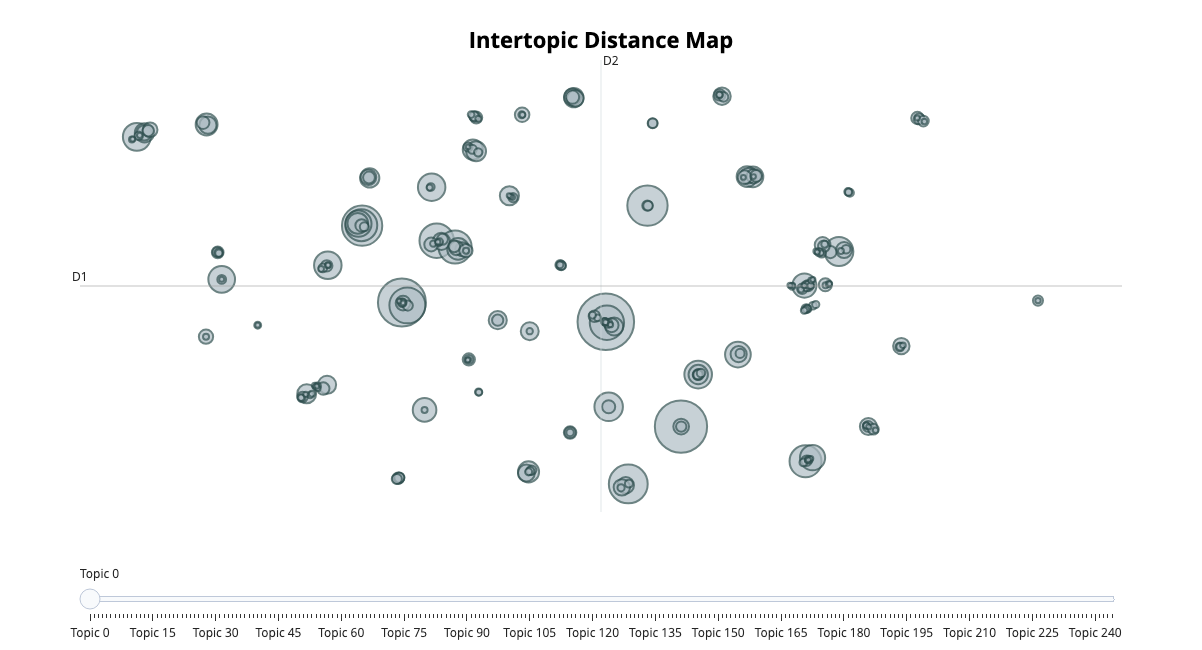

In [34]:
model.visualize_topics()

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



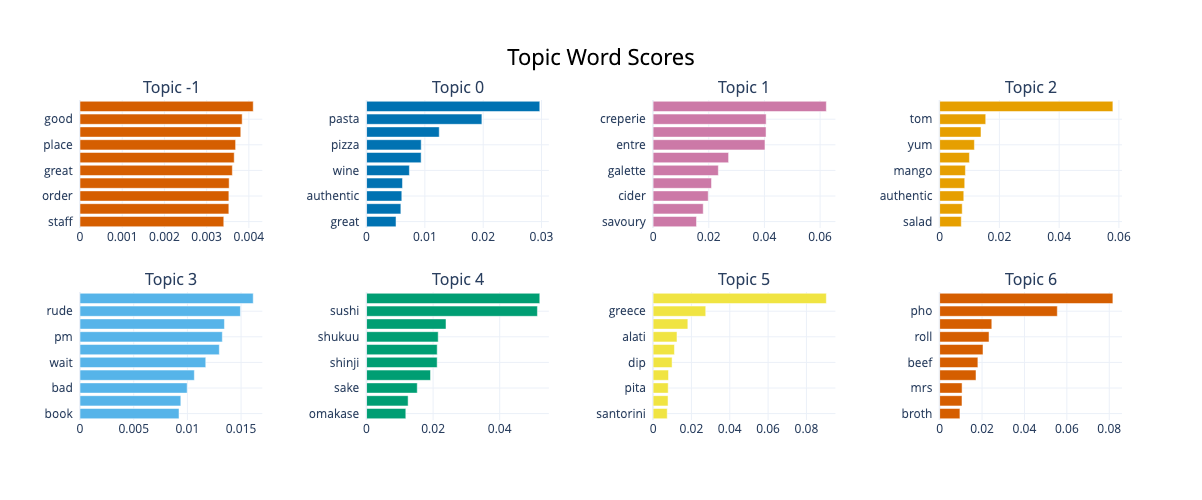

In [36]:
model.visualize_barchart(topics=[-1,0,1,2,3,4,5,6], n_words=10)

In [44]:
model2 = BERTopic(nr_topics=10) 
#convert to list 
docs = reviews.review_text.to_list()
 
topics, probabilities = model2.fit_transform(docs)

2023-11-25 16:00:10,322 - BERTopic - Transformed documents to Embeddings
2023-11-25 16:00:19,812 - BERTopic - Reduced dimensionality
2023-11-25 16:00:21,379 - BERTopic - Clustered reduced embeddings
2023-11-25 16:00:22,969 - BERTopic - Reduced number of topics from 248 to 10


/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



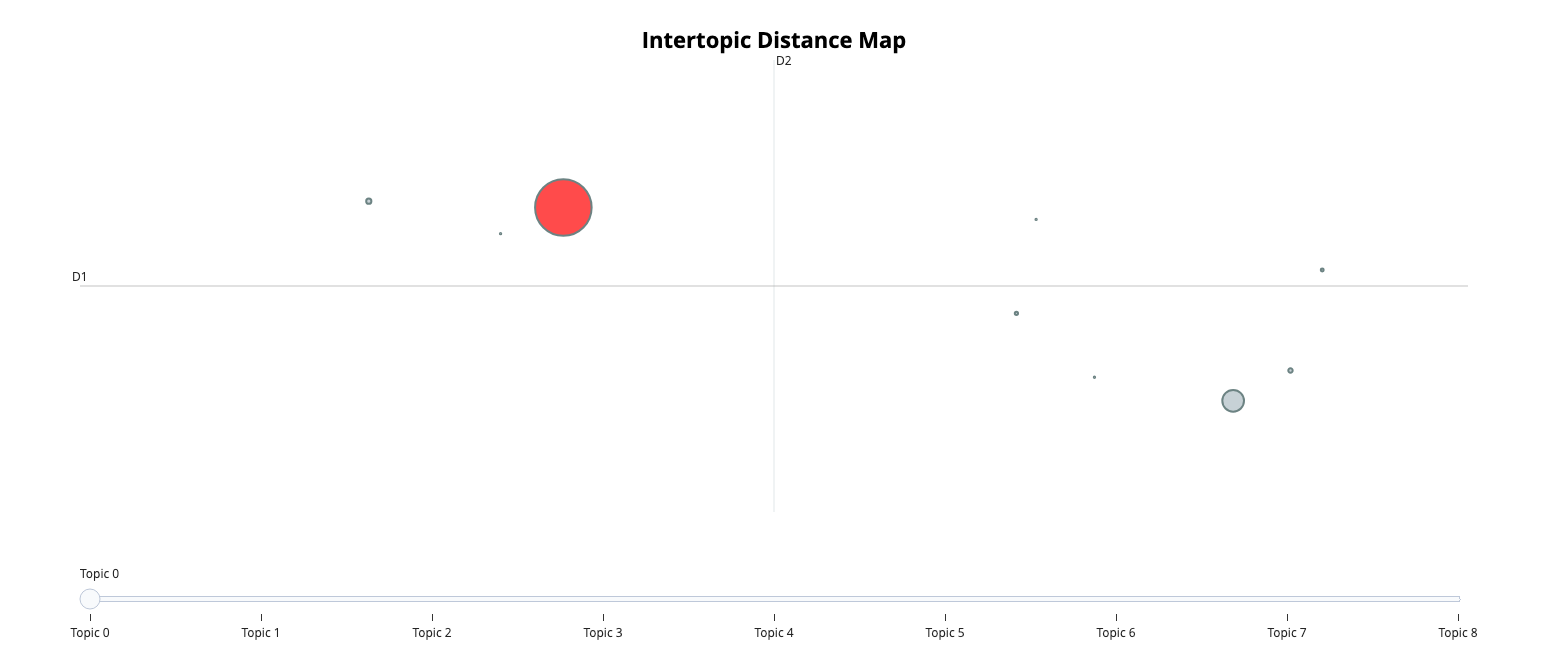

In [45]:
model2.visualize_topics()

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



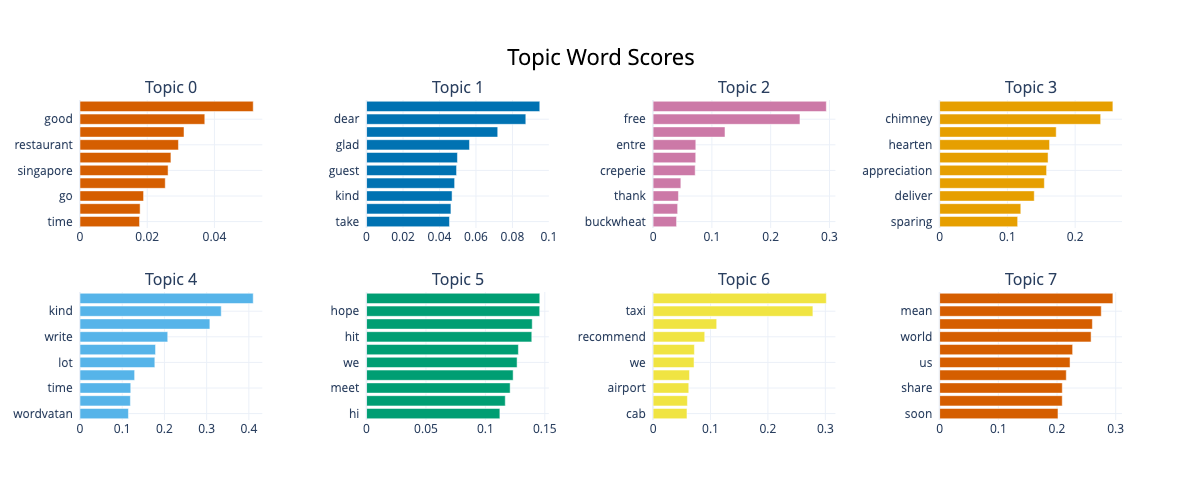

In [46]:
model2.visualize_barchart(n_words=10)

In [53]:
data.reset_index(drop=True, inplace=True)

In [54]:
# Load a pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

df = data.copy()

# Get embeddings for each review_text
embeddings = model.encode(df['review_text'], convert_to_tensor=True)

# Manually set topics (you can customize this based on your needs)
topics = {'food': model.encode(['delicious food'], convert_to_tensor=True),
          'service': model.encode(['excellent service'], convert_to_tensor=True),
          'ambiance': model.encode(['pleasant ambiance'], convert_to_tensor=True)}

# Calculate similarity scores for each review_text with respect to each topic
scores = {topic: util.pytorch_cos_sim(embeddings, topics[topic]) for topic in topics}

# Display scores
for topic, score_matrix in scores.items():
    df[f'{topic}_score'] = score_matrix.max(dim=1).values.cpu().numpy()

print(df)


           restaurant_name                                        review_text  \
0      entre_nous_creperie  come entre nous periodically past year seem se...   
1      entre_nous_creperie  absolutely delicious menu lovely offer excepti...   
2      entre_nous_creperie  thank much choose entre nous creperie recently...   
3      entre_nous_creperie  lovely little french restaurant really authent...   
4      entre_nous_creperie  dear rebecca thank much dining entre nous crep...   
...                    ...                                                ...   
40941     chao_san_cuisine  chao serve one good authentic teochew cuisine ...   
40942     chao_san_cuisine  love dish order suckle pig advance regret also...   
40943     chao_san_cuisine  country famous cuisine melt nation opp restaur...   
40944     chao_san_cuisine  make reservation highly recommend inside seat ...   
40945     chao_san_cuisine  introduce good friend try food restaurant twic...   

       word_count  review_r

In [55]:
df.head()

,restaurant_name,review_text,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score
0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0,0.462757,0.427331,0.331545
1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0,0.448536,0.318372,0.282956
2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0,0.430254,0.381057,0.289790
3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0,0.416918,0.309187,0.258666
4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0,0.414757,0.294917,0.352158


In [56]:
# df.to_csv('df_bert_model.csv')

In [58]:
df.describe()

,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score
count,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000
mean,39.394959,4.231146,59.671103,0.400088,0.267942,0.243458
std,18.942218,0.879205,44.794317,0.129123,0.107598,0.079995
min,1.000000,1.000000,0.000000,-0.195335,-0.092848,-0.106955
25%,30.000000,4.000000,19.000000,0.330595,0.191868,0.191683
50%,45.000000,4.500000,48.000000,0.420326,0.259301,0.243835
75%,45.000000,5.000000,99.000000,0.491194,0.336181,0.294828
max,859.000000,5.000000,146.000000,0.817710,0.753817,0.717879


## Unsupervised

In [59]:
# Load a pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

df2 = data.copy()

# Get embeddings for each review_text
embeddings = model.encode(df2['review_text'], convert_to_tensor=True)

# Manually set topics (you can customize this based on your needs)
topics = {'food': model.encode(['delicious food'], convert_to_tensor=True),
          'service': model.encode(['excellent service'], convert_to_tensor=True),
          'ambiance': model.encode(['pleasant ambiance'], convert_to_tensor=True),
         'authentic':model.encode(['authentic food'], convert_to_tensor=True)}

# Calculate similarity scores for each review_text with respect to each topic
scores = {topic: util.pytorch_cos_sim(embeddings, topics[topic]) for topic in topics}

# Display scores
for topic, score_matrix in scores.items():
    df2[f'{topic}_score'] = score_matrix.max(dim=1).values.cpu().numpy()

df2.head()


,restaurant_name,review_text,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score
0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0,0.462757,0.427331,0.331545,0.492026
1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0,0.448536,0.318372,0.282956,0.371091
2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0,0.430254,0.381057,0.289790,0.406790
3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0,0.416918,0.309187,0.258666,0.506409
4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0,0.414757,0.294917,0.352158,0.438276


In [ ]:
# the above scores are similarity scores

In [60]:
df2.describe()

,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score
count,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000
mean,39.394959,4.231146,59.671103,0.400088,0.267942,0.243458,0.413295
std,18.942218,0.879205,44.794317,0.129123,0.107598,0.079995,0.106987
min,1.000000,1.000000,0.000000,-0.195335,-0.092848,-0.106955,-0.153411
25%,30.000000,4.000000,19.000000,0.330595,0.191868,0.191683,0.358629
50%,45.000000,4.500000,48.000000,0.420326,0.259301,0.243835,0.429649
75%,45.000000,5.000000,99.000000,0.491194,0.336181,0.294828,0.485154
max,859.000000,5.000000,146.000000,0.817710,0.753817,0.717879,0.749839


In [ ]:
# individual reviews level

In [67]:
# obtaining the average score of each review ot have an overall score of the columns

columns_to_average = ['food_score', 'service_score', 'ambiance_score', 'authentic_score']

# Calculate the average cosine similarity for each row
df2['average_cosine_similarity'] = df2[columns_to_average].mean(axis=1)

df2.head()

,restaurant_name,review_text,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity
0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0,0.462757,0.427331,0.331545,0.492026,0.428415
1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0,0.448536,0.318372,0.282956,0.371091,0.355239
2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0,0.430254,0.381057,0.289790,0.406790,0.376973
3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0,0.416918,0.309187,0.258666,0.506409,0.372795
4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0,0.414757,0.294917,0.352158,0.438276,0.375027


In [65]:
# restaurant level

In [70]:
grouped_by_restaurant = df2.groupby('restaurant_label')[['food_score', 'service_score', 'ambiance_score', 'authentic_score', 'average_cosine_similarity']].mean()

In [71]:
grouped_by_restaurant.describe()

,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.408964,0.249337,0.236037,0.416718,0.327764
std,0.034794,0.040690,0.030276,0.032178,0.025112
min,0.275318,0.150029,0.139349,0.285893,0.247341
25%,0.391556,0.219220,0.213627,0.401256,0.311935
50%,0.413321,0.248320,0.239082,0.419201,0.329962
75%,0.430648,0.277528,0.255216,0.436425,0.344995
max,0.482618,0.376933,0.318639,0.491964,0.380185


In [72]:
grouped_by_restaurant.head()

,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity
restaurant_label,,,,,
0,0.350580,0.279037,0.281549,0.373190,0.321089
1,0.470979,0.258552,0.284878,0.467595,0.370501
2,0.388332,0.216109,0.194512,0.393876,0.298207
3,0.415788,0.181683,0.197800,0.401272,0.299136
4,0.440921,0.257636,0.246050,0.449827,0.348608


## Supervised

- vectorize the reviews
- set X and y
- train-test split
- predict the average_cosine_similarity of a review
- metric: rmse

In [86]:
X = df2['review_text']
y = df2['average_cosine_similarity']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28662,)
(28662,)
(12284,)
(12284,)


In [88]:
X_train

17185    go try thai food boyfriend love try many thing...
17456    meal lovely great starter lovely main criticis...
7823     much visit restaurant despite order minimal ow...
38839    service provide ms verma excellent recommendat...
19151    khansama highly recommend indian restaurant si...
                               ...                        
6265     thank leave we review glad enjoy take pride pr...
11284    habit write review local restaurant feel would...
38158    la forketta locate green leafy dempsey former ...
860      place many time time never disappoint galette ...
15795    drop shukuu japanese izakaya sake bar day impr...
Name: review_text, Length: 28662, dtype: object

In [92]:
# # Vectorize the review text using TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the parameters based on your data
# # X_train_vectorized = vectorizer.fit_transform(X_train)
# # X_test_vectorized = vectorizer.transform(X_test)

# X_train_vectorized = pd.DataFrame(vectorizer.fit_transform(X_train).toarray(), columns =vectorizer.get_feature_names_out())
# X_test_vectorized = pd.DataFrame(vectorizer.transform(X_test).toarray(), columns =vectorizer.get_feature_names_out())

# # Train a regression model (you can choose a different model based on your requirements)
# model = LinearRegression()
# model.fit(X_train_vectorized, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_vectorized)

# # Evaluate the model
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2400816446.8215394


In [136]:
# forming a function to vectorize and train the dataset using a pipeline and GridSearch
# rmse_scorer = make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))

def model(vectorizer, vec_name, model, model_name, X, y, params, cv_val=5):
    
    # instantiating the pipeline
    pipe = Pipeline([(vec_name, vectorizer),
                    (model_name, model)
                    ])
    print('Vectorizer: ', vec_name)
    print('Modeling... ', model_name)
    
    # instantiating the gridsearch with the parameters and the score to be obtained
    pipe_gs = GridSearchCV(pipe,
                         params,
                         cv=cv_val,
                        # score=rmse_scorer
                         )
    
    # training the dataset
    pipe_gs.fit(X, y)
    
    # getting the predicted values for the train and test sets
    y_pred_train = pipe_gs.predict(X)
    y_pred_test = pipe_gs.predict(X_test)
    
    best_para = pipe_gs.best_params_
    train_score = round(mean_squared_error(y,y_pred_train, squared=False),3)
    test_score = round(mean_squared_error(y_test,y_pred_test, squared=False),3)

    return best_para, train_score, test_score

    # printing the best parameters and the scores
    # print('Best parameters: ', pipe_gs.best_params_)
    # print(f'RMSE score (train): {pipe_gs.score(X,y):.3f}')
    # print(f'RMSE score (test): {pipe_gs.score(X_test,y_test):.3f}')

In [134]:
Pipeline([('cvec', CountVectorizer()),
                ('linreg', LinearRegression())
                ]).get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('linreg', LinearRegression())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'linreg': LinearRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

In [137]:
# Using CountVectorizer as a transformer and modeling using Linear Regression
cvec_linreg_params = {'cvec__ngram_range': [(1, 1), (1,2)],
                'cvec__max_features': [500, 800, 1000]
}

cvec_linreg = model(CountVectorizer(), 'cvec',
                      LinearRegression(), 'linreg',
                      X_train, y_train,
                     cvec_linreg_params,
                     5)

# storing the best parameter, rmse_train and rmse_test scores 
best_params_cl, rmse_train_cl, rmse_test_cl = cvec_linreg

Vectorizer:  cvec
Modeling...  linreg


In [138]:
# Using CountVectorizer as a transformer and modeling using Linear Regression
# %%time

cvec_linreg_params2 = {'cvec__ngram_range': [(1, 1), (1,2), (2,2)],
                'cvec__max_features': [800, 1000, 2000, 2500, 3000]
}

cvec_linreg2 = model(CountVectorizer(), 'cvec',
                      LinearRegression(), 'linreg',
                      X_train, y_train,
                     cvec_linreg_params2,
                     5)

# storing the best parameter, rmse_train and rmse_test scores 
best_params_cl2, rmse_train_cl2, rmse_test_cl2 = cvec_linreg2

Vectorizer:  cvec
Modeling...  linreg


In [139]:
# Using CountVectorizer as a transformer and modeling using Linear Regression
# %%time

tfidf_linreg_params = {'tfidf__ngram_range': [(1, 1), (1,2), (2,2)],
                'tfidf__max_features': [800, 1000, 2000, 2500, 3000]
}

tfid_linreg = model(TfidfVectorizer(), 'tfidf',
                      LinearRegression(), 'linreg',
                      X_train, y_train,
                     tfidf_linreg_params,
                     8)

# storing the best parameter, rmse_train and rmse_test scores 
best_params_tl, rmse_train_tl, rmse_test_tl = tfid_linreg

Vectorizer:  tfidf
Modeling...  linreg


In [140]:
# Using CountVectorizer as a transformer and modeling using Linear Regression
tfidf_linreg_params2 = {'tfidf__ngram_range': [(1, 1), (1,2), (2,2)],
                'tfidf__max_features': [2800, 3000, 3500, 4000, 4500, 5000]
}

tfid_linreg2 = model(TfidfVectorizer(), 'tfidf',
                      LinearRegression(), 'linreg',
                      X_train, y_train,
                     tfidf_linreg_params2,
                     5)

# storing the best parameter, rmse_train and rmse_test scores 
best_params_tl2, rmse_train_tl2, rmse_test_tl2 = tfid_linreg2

Vectorizer:  tfidf
Modeling...  linreg


In [141]:
print(best_params_cl, rmse_train_cl, rmse_test_cl)
print(best_params_cl2, rmse_train_cl2, rmse_test_cl2)
print(best_params_tl, rmse_train_tl, rmse_test_tl)
print(best_params_tl2, rmse_train_tl2, rmse_test_tl2)

{'cvec__max_features': 1000, 'cvec__ngram_range': (1, 1)} 0.047 0.049
{'cvec__max_features': 2000, 'cvec__ngram_range': (1, 1)} 0.044 0.048
{'tfidf__max_features': 2500, 'tfidf__ngram_range': (1, 2)} 0.04 0.044
{'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)} 0.039 0.044


In [ ]:
## Classification

In [142]:
df2.head()

,restaurant_name,review_text,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity
0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0,0.462757,0.427331,0.331545,0.492026,0.428415
1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0,0.448536,0.318372,0.282956,0.371091,0.355239
2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0,0.430254,0.381057,0.289790,0.406790,0.376973
3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0,0.416918,0.309187,0.258666,0.506409,0.372795
4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0,0.414757,0.294917,0.352158,0.438276,0.375027


In [143]:
df2.describe()

,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity
count,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000,40946.000000
mean,39.394959,4.231146,59.671103,0.400088,0.267942,0.243458,0.413295,0.331196
std,18.942218,0.879205,44.794317,0.129123,0.107598,0.079995,0.106987,0.076071
min,1.000000,1.000000,0.000000,-0.195335,-0.092848,-0.106955,-0.153411,-0.059397
25%,30.000000,4.000000,19.000000,0.330595,0.191868,0.191683,0.358629,0.288140
50%,45.000000,4.500000,48.000000,0.420326,0.259301,0.243835,0.429649,0.339152
75%,45.000000,5.000000,99.000000,0.491194,0.336181,0.294828,0.485154,0.383006
max,859.000000,5.000000,146.000000,0.817710,0.753817,0.717879,0.749839,0.594669


In [156]:
df2['sentiment'] = df2['average_cosine_similarity'].apply(lambda x: '1' if x >= 0.3 else '0')

In [157]:
df2.head()

,restaurant_name,review_text,word_count,review_rating,restaurant_label,food_score,service_score,ambiance_score,authentic_score,average_cosine_similarity,sentiment
0,entre_nous_creperie,come entre nous periodically past year seem se...,47,5.0,0,0.462757,0.427331,0.331545,0.492026,0.428415,1
1,entre_nous_creperie,absolutely delicious menu lovely offer excepti...,42,5.0,0,0.448536,0.318372,0.282956,0.371091,0.355239,1
2,entre_nous_creperie,thank much choose entre nous creperie recently...,45,5.0,0,0.430254,0.381057,0.289790,0.406790,0.376973,1
3,entre_nous_creperie,lovely little french restaurant really authent...,45,4.5,0,0.416918,0.309187,0.258666,0.506409,0.372795,1
4,entre_nous_creperie,dear rebecca thank much dining entre nous crep...,45,4.0,0,0.414757,0.294917,0.352158,0.438276,0.375027,1


In [158]:
df2['sentiment'].value_counts(normalize=True)

sentiment
1    0.701583
0    0.298417
Name: proportion, dtype: float64

In [163]:
X = df2['review_text']
y = df2['sentiment']

In [155]:
## Under and Oversampling

In [164]:
def train_and_evaluate(X, y, resampler, classifier, vectorizer, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)

    # Apply resampling to the training data
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_vectorized, y_train)

    # Train the classifier
    classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    X_test_vectorized = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_vectorized)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {f1:.2f}")
    print("Classification Report:\n", classification_rep)

In [ ]:
# Example usage:
# SMOTE resampler, SVM classifier, and TfidfVectorizer
train_and_evaluate(X, y, SMOTE(random_state=42), SVC(), TfidfVectorizer())

# RandomUnderSampler resampler, RandomForestClassifier, and CountVectorizer
# train_and_evaluate(X, y, RandomUnderSampler(random_state=42), RandomForestClassifier(), CountVectorizer())

In [ ]:
X = df['review_text']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Train a Support Vector Machine (SVM) classifier
classifier = SVC()
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
X_test_vectorized = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

In [154]:
# Assuming your DataFrame is named df
X = df2['review_text']
y = df2['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
classifier = SVC()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

   detractor       0.80      0.68      0.74      2430
    promoter       0.87      0.93      0.90      5760

    accuracy                           0.86      8190
   macro avg       0.84      0.81      0.82      8190
weighted avg       0.85      0.86      0.85      8190



In [ ]:
model3.visualize_topics_per_class(topics_per_class, top_n_topics=10)


/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



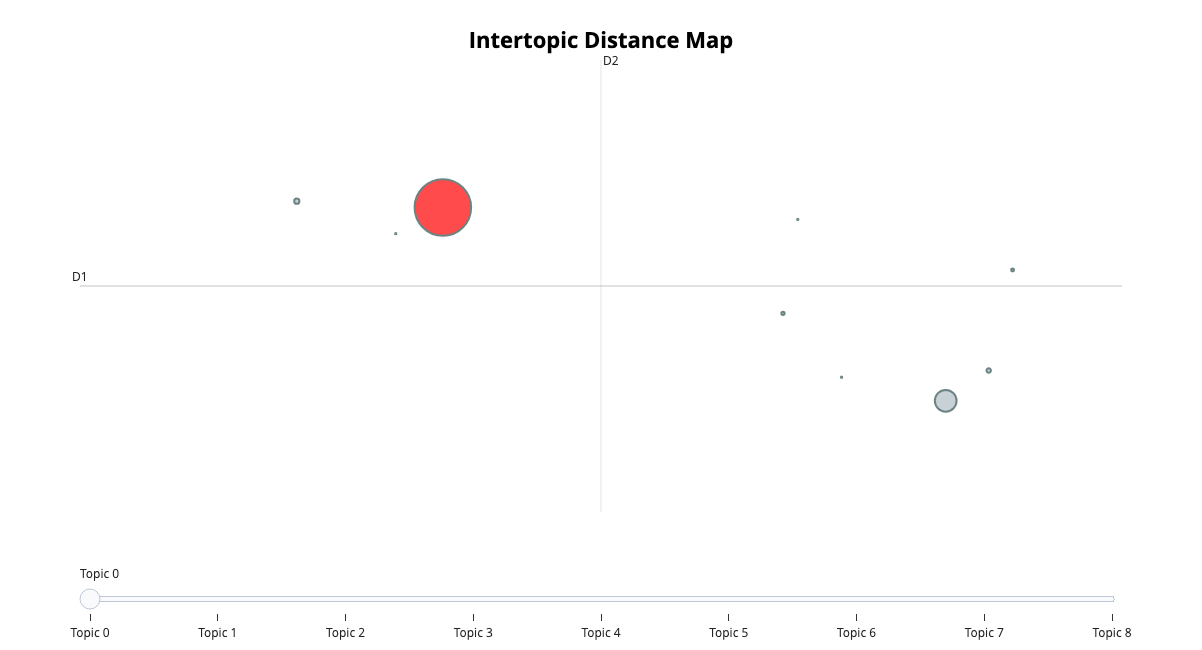

In [45]:
model2.visualize_topics()

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



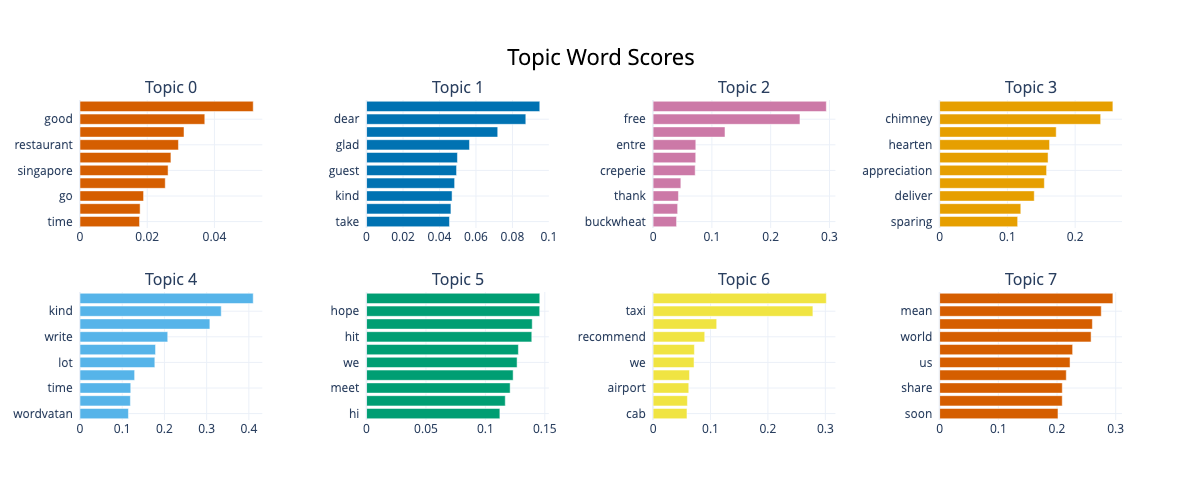

In [46]:
model2.visualize_barchart(n_words=10)

In [ ]:
%%time

labels = ['food_quality', 'service', 'ambiance', 'overall_experience']

zs_reviews = zero_shot_classisfication(reviews, 'cleaned_text_lem', labels)

In [22]:
def zero_shot_classification(df, col, labels):
    # Initialize the zero-shot classification pipeline
    new_df = df.copy()
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

    for label in labels:
        new_df[label] = 0.0  # Initialize the column with zeros for each candidate label

    for i, review_text in tqdm(enumerate(new_df[col]), desc="Processing Reviews", total=len(new_df)):
        # Perform zero-shot classification for the review text
        result = classifier(review_text, labels, multi_label=True)

        for j, label in enumerate(labels):
            new_df.at[i, label] = result['scores'][j]

    return new_df


labels = ['food_quality', 'service', 'ambiance', 'overall_experience']
zs_reviews = zero_shot_classification(reviews, 'cleaned_text_lem', labels)

/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/liyenauseff/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWar

Processing Reviews:   0%|          | 0/40942 [00:00<?, ?it/s]

In [23]:
zs_reviews.head()

,cleaned_text_lem,restaurant_label,food_quality,service,ambiance,overall_experience
0,come entre nous periodically past year seem se...,0.0,0.990804,0.974765,0.708064,0.005743
1,absolutely delicious menu lovely offer excepti...,0.0,0.984318,0.966782,0.108490,0.045861
2,thank much choose entre nous creperie recently...,0.0,0.945397,0.879296,0.871327,0.576215
3,lovely little french restaurant really authent...,0.0,0.963721,0.952793,0.695291,0.637239
4,dear rebecca thank much dining entre nous crep...,0.0,0.987780,0.970174,0.964628,0.740549


In [24]:
zs_reviews.columns

Index(['cleaned_text_lem', 'restaurant_label', 'food_quality', 'service',
       'ambiance', 'overall_experience'],
      dtype='object')

In [26]:
zs_reviews.iloc[:3,:]

,cleaned_text_lem,restaurant_label,food_quality,service,ambiance,overall_experience
0,come entre nous periodically past year seem se...,0.0,0.990804,0.974765,0.708064,0.005743
1,absolutely delicious menu lovely offer excepti...,0.0,0.984318,0.966782,0.108490,0.045861
2,thank much choose entre nous creperie recently...,0.0,0.945397,0.879296,0.871327,0.576215


In [31]:
zs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40947 entries, 0 to 28025
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cleaned_text_lem    40942 non-null  object 
 1   restaurant_label    40942 non-null  float64
 2   food_quality        40947 non-null  float64
 3   service             40947 non-null  float64
 4   ambiance            40947 non-null  float64
 5   overall_experience  40947 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.2+ MB


In [32]:
zs_reviews[zs_reviews['restaurant_label'].isnull()]

,cleaned_text_lem,restaurant_label,food_quality,service,ambiance,overall_experience
8154,NaN,NaN,0.971621,0.945000,0.071411,0.057877
8163,NaN,NaN,0.995604,0.965937,0.961140,0.960985
8165,NaN,NaN,0.985788,0.859831,0.467956,0.066326
14905,NaN,NaN,0.987448,0.973357,0.946509,0.472281
28025,NaN,NaN,0.996197,0.988327,0.975356,0.904937


In [30]:
zs_reviews.drop(columns=['cleaned_text_lem'])

,restaurant_label,food_quality,service,ambiance,overall_experience
0,0.0,0.990804,0.974765,0.708064,0.005743
1,0.0,0.984318,0.966782,0.108490,0.045861
2,0.0,0.945397,0.879296,0.871327,0.576215
3,0.0,0.963721,0.952793,0.695291,0.637239
4,0.0,0.987780,0.970174,0.964628,0.740549
...,...,...,...,...,...
8154,NaN,0.971621,0.945000,0.071411,0.057877
8163,NaN,0.995604,0.965937,0.961140,0.960985
8165,NaN,0.985788,0.859831,0.467956,0.066326
14905,NaN,0.987448,0.973357,0.946509,0.472281


In [42]:
zs_reviews[~zs_reviews['restaurant_label'].isnull()]

,cleaned_text_lem,restaurant_label,food_quality,service,ambiance,overall_experience
0,come entre nous periodically past year seem se...,0.0,0.990804,0.974765,0.708064,0.005743
1,absolutely delicious menu lovely offer excepti...,0.0,0.984318,0.966782,0.108490,0.045861
2,thank much choose entre nous creperie recently...,0.0,0.945397,0.879296,0.871327,0.576215
3,lovely little french restaurant really authent...,0.0,0.963721,0.952793,0.695291,0.637239
4,dear rebecca thank much dining entre nous crep...,0.0,0.987780,0.970174,0.964628,0.740549
...,...,...,...,...,...,...
40942,chao serve one good authentic teochew cuisine ...,146.0,0.000000,0.000000,0.000000,0.000000
40943,love dish order suckle pig advance regret also...,146.0,0.000000,0.000000,0.000000,0.000000
40944,country famous cuisine melt nation opp restaur...,146.0,0.000000,0.000000,0.000000,0.000000
40945,make reservation highly recommend inside seat ...,146.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Step 1: Aggregate Scores for Each Restaurant
# Step 2: Calculate NPS for Each Classifier
# Step 3: Calculate Overall NPS for Each Restaurant
# Step 4: Interpret the Results
# Analyze the 'Overall_NPS' column in the 'average_scores' dataframe.
